## <font color='goldenrod'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

- Identify factors that contribute to the death rate of cancer patients.
- Build a multiple linear regression model to predict the death rate - "TARGET_deathRate".
- Check for the assumptions of your model as well as perform k-fold (k=10) cross-validation while challenging your solution

---

### b) Defining the Metric for Success

**The project will be considered a success when we are able to fit linear regression to our data and make predictions.**

**While performing model selection/diagnosis, I was required to perform the following steps in an effort to check for the following assumptions:**

- Assess the linearity of the model (parameters)
- Assess heteroskedasticity
- Assess the normality of residual distribution
- Assess multicollinearity

---

### c) Understanding the Context 

**The African Cancer Institute at Stellenbosch University aims to contribute to improving cancer prevention (both primary and secondary prevention, including screening), diagnosis and management in Africa. The institute is a coordinating and directive institution for research and training in the field of cancer within the University.**

### d) Recording the Experimental Design

1. Load libraries and dataset.
2. Perform data cleaning where necessary.
3. Compute correlations and drop highly correlated variables.
4. Split into 80% train and 20% test sets, apply Linear Regression, and make predictions.
5. Calculate RMSE and R-squared values.
6. Interpret and summarize findings.
7. Provide recommendations.
8. Challenge the solution.

---

### e) Data Relevance & Acknowledgement.

**These dataset provided was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.** 

**Project Source: https://bit.ly/2U2QlM4**

**The data was relevant to answering the question.**

---

## <font color='goldenrod'>2. Prepare the Data</font>

### 2.1 Import

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
# import missingno as msno
import scipy.stats as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.pipeline import Pipeline, make_pipeline


# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
# Don't show numbers as scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\tarac\\Downloads\\Projects\\ml-project\\notebook\\data\\cancer_reg.csv")

df.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0      1397.00               469            164.90         489.80      61898   
1       173.00                70            161.30         411.60      48127   
2       102.00                50            174.70         349.70      49348   
3       427.00               202            194.80         430.40      44243   
4        57.00                26            144.40         350.10      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131           11.20       499.75   (61494.5, 125635]      39.30   
1       43269           18.60        23.11  (48021.6, 51046.4]      33.00   
2       21026           14.60        47.56  (48021.6, 51046.4]      45.00   
3       75882           17.10       342.64    (42724.4, 45201]      42.80   
4       10321           12.50         0.00  (48021.6, 51046.4]      48.30   

   medianagemale  medianagefemale                     geography  \
0          36.90            41.70     Kitsap County, Washington   
1          32.20            33.70   Kittitas County, Washington   
2          44.00            45.80  Klickitat County, Washington   
3          42.20            43.40      Lewis County, Washington   
4          47.80            48.90    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctsomecol18_24  pctbachdeg18_24  \
0           52.50         11.50       39.50            42.10             6.90   
1           44.50          6.10       22.40            64.00             7.50   
2           54.20         24.00       36.60              NaN             9.50   
3           52.70         20.20       41.20            36.10             2.50   
4           57.80         14.90       43.00            40.00             2.00   

   pcths25_over  pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
0         23.20              19.60               51.90                  8.00   
1         26.00              22.70               55.90                  7.80   
2         29.00              16.00               45.90                  7.00   
3         31.60               9.30               48.30                 12.10   
4         33.40              15.00               48.20                  4.80   

   pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
0               75.10                      NaN               41.60   
1               70.20                    53.80               43.60   
2               63.70                    43.50               34.90   
3               58.40                    40.30               35.00   
4               61.60                    43.90               35.10   

   pctpubliccoverage  pctpubliccoveragealone  pctwhite  pctblack  pctasian  \
0              32.90                   14.00     81.78      2.59      4.82   
1              31.10                   15.30     89.23      0.97      2.25   
2              42.10                   21.10     90.92      0.74      0.47   
3              45.30                   25.00     91.74      0.78      1.16   
4              44.00                   22.70     94.10      0.27      0.67   

   pctotherrace  pctmarriedhouseholds  birthrate  
0          1.84                 52.86       6.12  
1          3.74                 45.37       4.33  
2          2.75                 54.44       3.73  
3          1.36                 51.02       4.60  
4          0.49                 54.03       6.80

**Shape of the dataset**

In [3]:
df.shape

(3047, 33)

### 2.2 Dataset Information

| Column number | Column Name | Column Type | Description |
| --- | --- | --- | --- |
| 0 | avganncount | decimal | Mean number of reported cases of cancer diagnosed annually (a) |
| 1 | avgdeathsperyear | integer | Mean number of reported mortalities due to cancer (a) |
| 2 | target_deathrate | decimal | Dependent variable. Mean per capita (100,000) cancer mortalities (a) |
| 3 | incidencerate | decimal | Mean per capita (100,000) cancer diagnoses (a) |
| 4 | medincome | integer | Median income per county (b) |
| 5 | popest2015 | integer | Population of county (b) |
| 6 | povertypercent | decimal | Percent of populace in poverty (b) |
| 7 | studypercap | decimal | Per capita number of cancer-related clinical trials per county (a) |
| 8 | binnedinc | string | Median income per capita binned by decile (b) |
| 9 | medianage | decimal | Median age of county residents (b) |
| 10 | medianagemale | decimal | Median age of male county residents (b) |
| 11 | medianagefemale | decimal | Median age of female county residents (b) |
| 12 | geography | string | County name (b) |
| 13 | percentmarried | decimal | Percent of county residents who are married (b) |
| 14 | pctnohs18_24 | decimal | Percent of county residents ages 18-24 highest education attained: less than high school (b) |
| 15 | pcths18_24 | decimal | Percent of county residents ages 18-24 highest education attained: high school diploma (b) |
| 16 | pctsomecol18_24 | decimal | Percent of county residents ages 18-24 highest education attained: some college (b) |
| 17 | pctbachdeg18_24 | decimal | Percent of county residents ages 18-24 highest education attained: bachelor's degree (b) |
| 18 | pcths25_over | decimal | Percent of county residents ages 25 and over highest education attained: high school diploma (b) |
| 19 | pctbachdeg25_over | decimal | Percent of county residents ages 25 and over highest education attained: bachelor's degree (b) |
| 20 | pctemployed16_over | decimal | Percent of county residents ages 16 and over employed (b) |
| 21 | pctunemployed16_over | decimal | Percent of county residents ages 16 and over unemployed (b) |
| 22 | pctprivatecoverage | decimal | Percent of county residents with private health coverage (b) |
| 23 | pctprivatecoveragealone | decimal | Percent of county residents with private health coverage alone (no public assistance) (b) |
| 24 | pctempprivcoverage | decimal | Percent of county residents with employee-provided private health coverage (b) |
| 25 | pctpubliccoverage | decimal | Percent of county residents with government-provided health coverage (b) |
| 26 | pctpubliccoveragealone | decimal | Percent of county residents with government-provided health coverage alone (b) |
| 27 | pctwhite | decimal | Percent of county residents who identify as White (b) |
| 28 | pctblack | decimal | Percent of county residents who identify as Black (b) |
| 29 | pctasian | decimal | Percent of county residents who identify as Asian (b) |
| 30 | pctotherrace | decimal | Percent of county residents who identify in a category which is not White, Black, or Asian (b) |
| 31 | pctmarriedhouseholds | decimal | Percent of married households (b) |
| 32 | birthrate | decimal | Number of live births relative to number of women in county (b) |

---

### 2.3 Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 2.3.1 Check Missing values

In [4]:
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)*100
missing_percentage.head()

pctsomecol18_24           74.99
pctprivatecoveragealone   19.99
pctemployed16_over         4.99
pctbachdeg18_24            0.00
pctmarriedhouseholds       0.00
dtype: float64

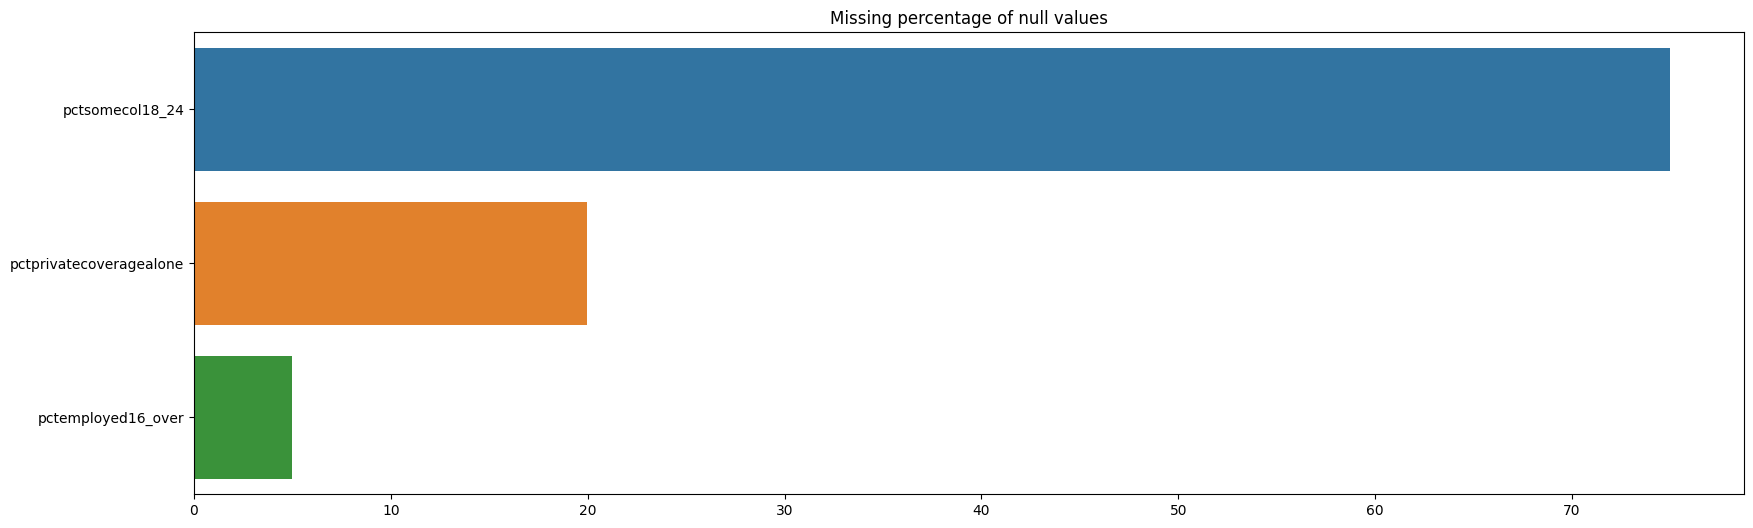

In [5]:
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.rcParams['figure.figsize'] = (20,6)
sns.barplot(x=missing_percentage.values, y=missing_percentage.index)
plt.title("Missing percentage of null values")
plt.show()

**Insights:**
- `pctsomecol18_24` has the majority of missing values. (75%). We will go ahead and drop this column.

In [6]:
df.drop(columns=["pctsomecol18_24"],inplace=True)

#### 2.3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

**Insights:**
- There are no duplicates values in the data set

#### 2.3.3 Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

#### 2.3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

avganncount                 929
avgdeathsperyear            608
target_deathrate           1053
incidencerate              1506
medincome                  2920
popest2015                 2999
povertypercent              333
studypercap                1117
binnedinc                    10
medianage                   325
medianagemale               298
medianagefemale             296
geography                  3047
percentmarried              362
pctnohs18_24                405
pcths18_24                  469
pctbachdeg18_24             219
pcths25_over                361
pctbachdeg25_over           281
pctemployed16_over          409
pctunemployed16_over        195
pctprivatecoverage          498
pctprivatecoveragealone     459
pctempprivcoverage          450
pctpubliccoverage           395
pctpubliccoveragealone      319
pctwhite                   3044
pctblack                   2972
pctasian                   2852
pctotherrace               2903
pctmarriedhouseholds       3043
birthrat

**Insights:**
- `geography` has 3047 unique values. This is a high cardinality categorical feature that will not be useful for our model

In [10]:
df.drop(columns=["geography"],inplace=True)

# Drop columns: 'binnedinc' column. New binned column with labels dervied from the 'medincome' column will be created
df.drop(columns=["binnedinc"],inplace=True)

# Write code to bin the "medincome" column into 3 bins
df["medincome_category"] = pd.cut(df["medincome"], bins=3, labels=["low", "medium", "high"]).astype('object')

df.shape

(3047, 31)

#### 2.3.5 Check statistics of the data set

In [11]:
df.describe()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
count      3047.00           3047.00           3047.00        3047.00   
mean        606.34            185.97            178.66         448.27   
std        1416.36            504.13             27.75          54.56   
min           6.00              3.00             59.70         201.30   
25%          76.00             28.00            161.20         420.30   
50%         171.00             61.00            178.10         453.55   
75%         518.00            149.00            195.20         480.85   
max       38150.00          14010.00            362.80        1206.90   

       medincome  popest2015  povertypercent  studypercap  medianage  \
count    3047.00     3047.00         3047.00      3047.00    3047.00   
mean    47063.28   102637.37           16.88       155.40      45.27   
std     12040.09   329059.22            6.41       529.63      45.30   
min     22640.00      827.00            3.20         0.00      22.30   
25%     38882.50    11684.00           12.15         0.00      37.70   
50%     45207.00    26643.00           15.90         0.00      41.00   
75%     52492.00    68671.00           20.40        83.65      44.00   
max    125635.00 10170292.00           47.40      9762.31     624.00   

       medianagemale  medianagefemale  percentmarried  pctnohs18_24  \
count        3047.00          3047.00         3047.00       3047.00   
mean           39.57            42.15           51.77         18.22   
std             5.23             5.29            6.90          8.09   
min            22.40            22.30           23.10          0.00   
25%            36.35            39.10           47.75         12.80   
50%            39.60            42.40           52.40         17.10   
75%            42.50            45.30           56.40         22.70   
max            64.70            65.70           72.50         64.10   

       pcths18_24  pctbachdeg18_24  pcths25_over  pctbachdeg25_over  \
count     3047.00          3047.00       3047.00            3047.00   
mean        35.00             6.16         34.80              13.28   
std          9.07             4.53          7.03               5.39   
min          0.00             0.00          7.50               2.50   
25%         29.20             3.10         30.40               9.40   
50%         34.70             5.40         35.30              12.30   
75%         40.70             8.20         39.65              16.10   
max         72.50            51.80         54.80              42.20   

       pctemployed16_over  pctunemployed16_over  pctprivatecoverage  \
count             2895.00               3047.00             3047.00   
mean                54.15                  7.85               64.35   
std                  8.32                  3.45               10.65   
min                 17.60                  0.40               22.30   
25%                 48.60                  5.50               57.20   
50%                 54.50                  7.60               65.10   
75%                 60.30                  9.70               72.10   
max                 80.10                 29.40               92.30   

       pctprivatecoveragealone  pctempprivcoverage  pctpubliccoverage  \
count                  2438.00             3047.00            3047.00   
mean                     48.45               41.20              36.25   
std                      10.08                9.45               7.84   
min                      15.70               13.50              11.20   
25%                      41.00               34.50              30.90   
50%                      48.70               41.10              36.30   
75%                      55.60               47.70              41.55   
max                      78.90               70.70              65.10   

       pctpubliccoveragealone  pctwhite  pctblack  pctasian  pctotherrace  \
count                 3047.00   3047.00   304

**Insights:**
**This summary presents data from 3047 U.S. counties on various statistics related to health, wealth, education, and demographics.**

- The summary statistics for the column `avganncount` show that the average number of reported cases of cancer diagnosed annually is 606.34. This means that, on average, 606.34 new cases of cancer are diagnosed each year. The standard deviation is 1416.36, which means that the number of reported cases of cancer diagnosed annually varies by about 1416 cases from the mean. The minimum number of reported cases of cancer diagnosed annually is 6, and the maximum number is 38150. The 25th percentile is 76, which means that 25% of the years in the data set had an average number of reported cases of cancer diagnosed annually of 76 or less. The 50th percentile is 171, which means that half of the years in the data set had an average number of reported cases of cancer diagnosed annually of 171 or less. The 75th percentile is 518, which means that 75% of the years in the data set had an average number of reported cases of cancer diagnosed annually of 518 or less. Overall, the summary statistics show that there is a wide range in the number of reported cases of cancer diagnosed annually. This range is likely due to the fact that the data set includes different countries, with different populations and different rates of cancer.

- The summary statistics for the column `avgdeathsperyear` tells us that the average number of deaths per year is 185.97. The standard deviation is 504.13, which means that the average number of deaths per year varies by about 504 people from the mean. The minimum number of deaths per year is 3, and the maximum number is 14010. The 25th percentile is 28, which means that 25% of the years in the data set had an average number of deaths per year of 28 or less. The 50th percentile is 61, which means that half of the years in the data set had an average number of deaths per year of 61 or less. The 75th percentile is 149, which means that 75% of the years in the data set had an average number of deaths per year of 149 or less. Overall, the summary statistics show that there is a wide range of average number of deaths per year in the data set, with some years having very few deaths and other years having many deaths.

- The average `target death rate` is 178.66 deaths per 100,000 people. The standard deviation is 27.75, which means that the target death rate varies by about 27.75 deaths per 100,000 people from the mean. The minimum target death rate is 59.70 deaths per 100,000 people, and the maximum is 362.80 deaths per 100,000 people. The 25th percentile is 161.20 deaths per 100,000 people, which means that 25% of the years in the data set had a target death rate of 161.20 deaths per 100,000 people or less. The 50th percentile is 178.10 deaths per 100,000 people, which means that half of the years in the data set had a target death rate of 178.10 deaths per 100,000 people or less. The 75th percentile is 195.20 deaths per 100,000 people, which means that 75% of the years in the data set had a target death rate of 195.20 deaths per 100,000 people or less. Overall, the summary statistics show that there is a wide range in the target death rate in the data set, with some years having very low target death rates and other years having very high target death rates. This range is likely due to the fact that the data set includes different countries, with different populations and different health systems. It is possible that the wide range in the target death rate is also due to the fact that the data set includes different years. Over time, health systems have improved and death rates have declined. This means that the target death rate may be higher for older years in the data set than for newer years.

- The average `incidence rate` is 448.27 cases per 100,000 people. The standard deviation is 54.56, which means that the incidence rate varies by about 54.56 cases per 100,000 people from the mean. The minimum incidence rate is 201.30 cases per 100,000 people, and the maximum is 1206.90 cases per 100,000 people. The 25th percentile is 420.30 cases per 100,000 people, which means that 25% of the years in the data set had an incidence rate of 420.30 cases per 100,000 people or less. The 50th percentile is 453.55 cases per 100,000 people, which means that half of the years in the data set had an incidence rate of 453.55 cases per 100,000 people or less. The 75th percentile is 480.85 cases per 100,000 people, which means that 75% of the years in the data set had an incidence rate of 480.85 cases per 100,000 people or less.

- The `median income` is $45,207. The mean income is $47,063.28, which is slightly higher than the median. The standard deviation is $12,040.09, which means that the income varies by about $12,000 from the mean. The minimum income is $22,640, and the maximum is $125,635. The 25th percentile is $38,882.50, which means that 25% of the years in the data set had an income of $38,882.50 or less. The 75th percentile is $52,492, which means that 75% of the years in the data set had an income of $52,492 or less.

# <font color='goldenrod'>3. Explore</font>

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 30 numerical features : ['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate', 'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage', 'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate']

We have 1 categorical features : ['medincome_category']


## 3.1 Univariate Analysis

In [13]:
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### 3.1.1 Distribution of the target variable

0.27472416526154386


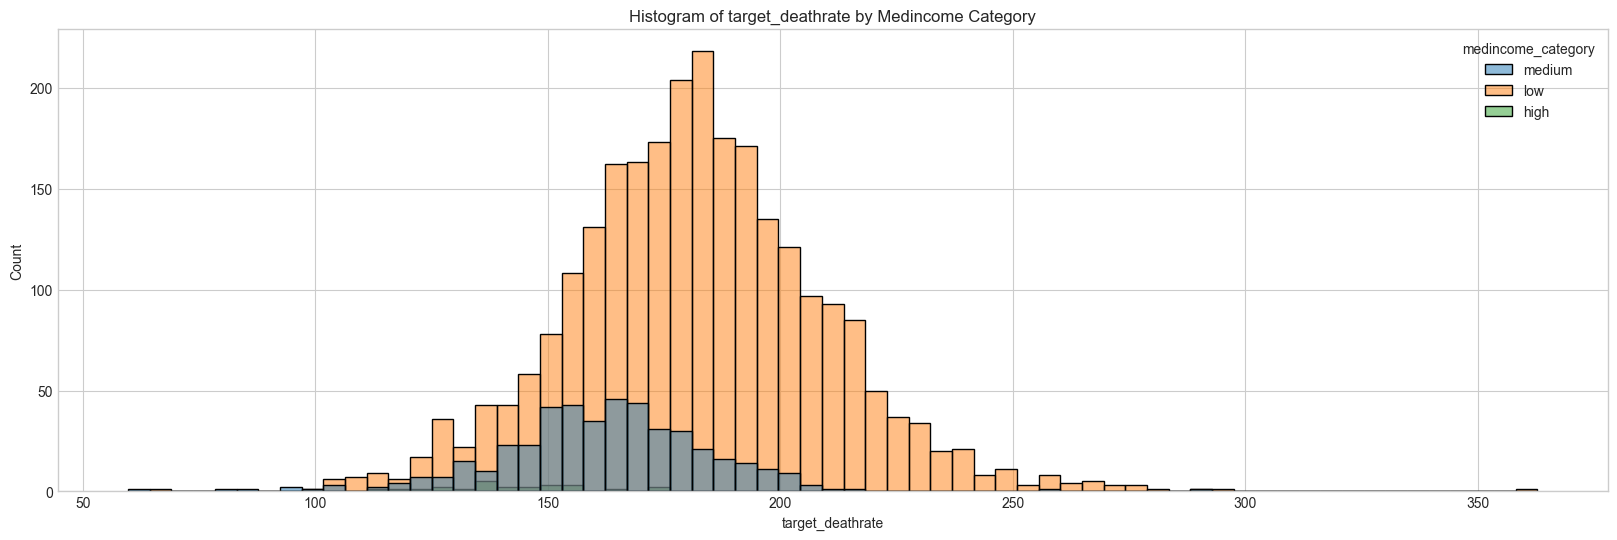

In [14]:
# Distribution of the target variable

plt.style.background = 'white'
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(20,6))
sns.histplot(data = df , x = 'target_deathrate', hue='medincome_category')
plt.xlabel('target_deathrate')
plt.ylabel('Count')
plt.title('Histogram of target_deathrate by Medincome Category')



print(df['target_deathrate'].skew())
plt.show()

**Insights:**
 - **The target variable has a slight skew to the right. This means that even though it is almost normally distributed, it does not have a bell-curve. Majority of the deathrate cancer mortalities are between 150 and 200. We can however note that there is the presence of outliers going up to a range of 362.80.**
 - **We can also note that high income earners are the fewest and have the lowest deathrate cancer mortalities. This could be dur=e to the fact the they have access to better healthcare facilities.**

### 3.1.2 Distribution of the Numerical Features

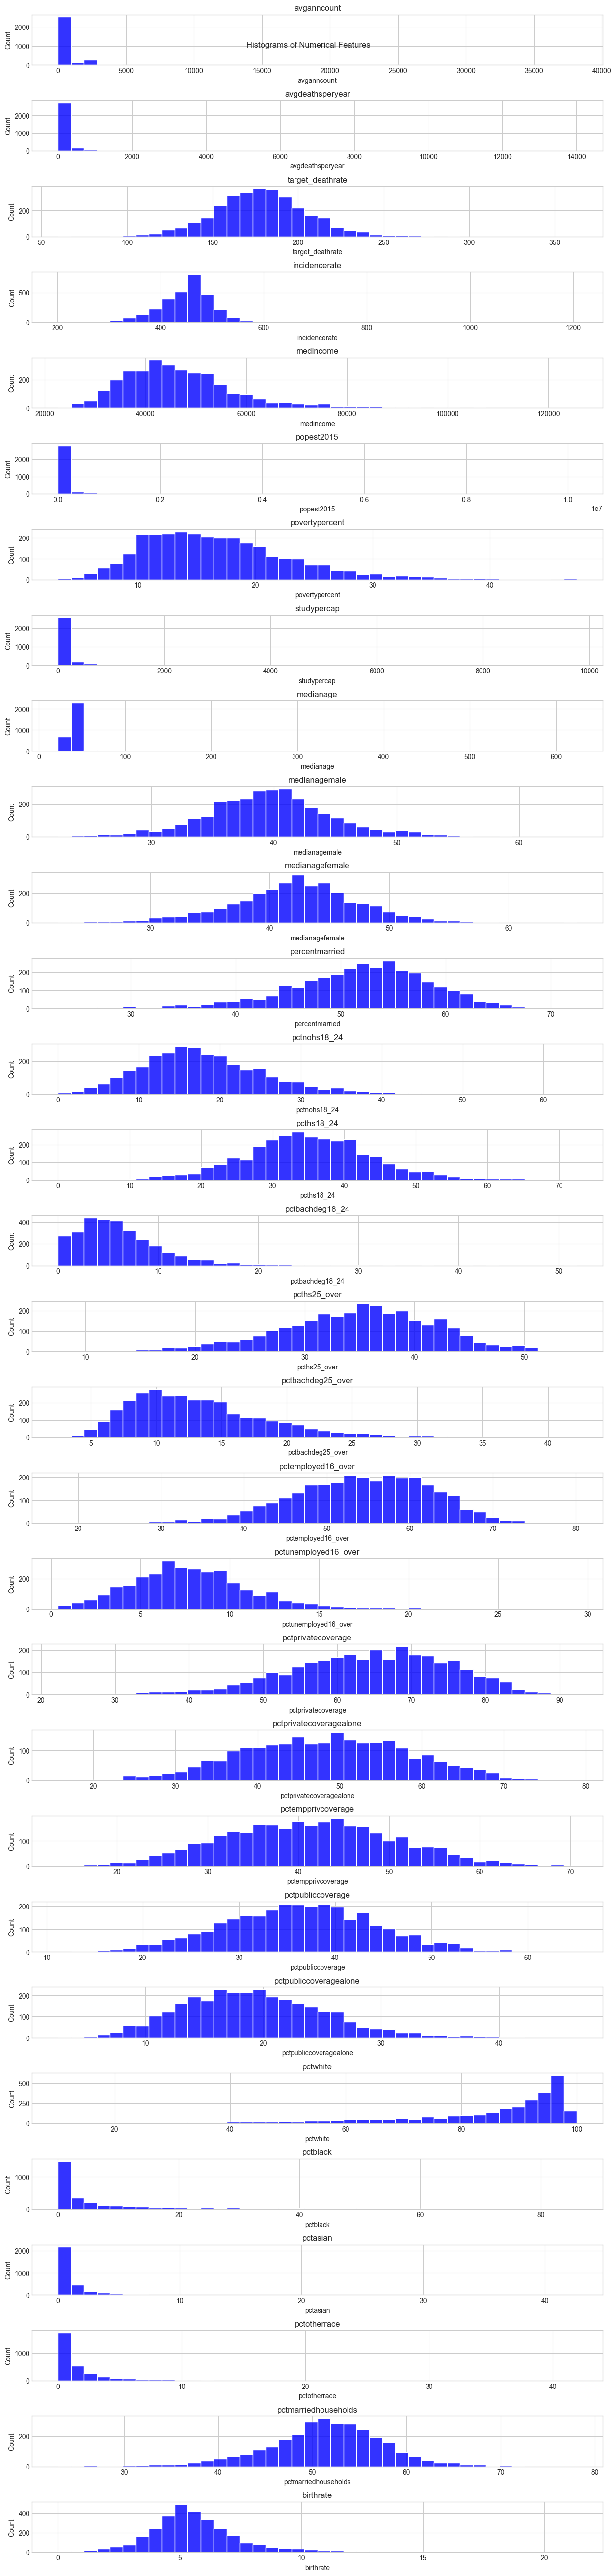

In [15]:
# Create a seaborn figure
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(15, 55))

# Plot a histogram for each feature and set labels
for i, feature in enumerate(numeric_features):
    ax = sns.histplot(df[feature], ax=axes[i], color='blue', edgecolor='white', linewidth=1, alpha=0.8, bins=40)
    ax.set_title(feature)
    # ax.set_xlabel('Feature')
    ax.set_ylabel('Count')

# Add a title to the figure
fig.suptitle('Histograms of Numerical Features')

# Adjust the spacing
fig.subplots_adjust(top=0.99, bottom=0.05, hspace=0.7)

# Show the figure
plt.show()

**The skew value is a measure of the asymmetry of a distribution, and it ranges from negative infinity to positive infinity. If the skew is negative, it means that the left tail of the distribution is longer than the right tail. If the skew is positive, it means that the right tail is longer. The closer the skew is to zero, the more symmetrical the distribution is. A skew of 10.680460336510137 indicates a highly positive skew, which means that the right tail of the distribution is much longer than the left tail.**

**Insights:**
- The distribution of the values in the `avganncount` column which represents the average annual count of cancer cases is `highly positively skewed` with a mean of `606.338544` and a median of `171.0.`
- The distribution of the values in the `avgdeathsperyear` column which represents the average annual count of cancer deaths is `highly positively skewed` with a mean of `185.870968` and a median of `61.0.`
- The distribution of the values in the `target_deathrate` column which represents the target variable is `slightly skewed`, but close to symmetrical with a mean of `178.554717` and a median of `178.10.`
- The distribution of the values in the `incidencerate` column which represents the cancer incidence rate is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `448.26` and a median of `453.54.`
- The distribution of the values in the `medincome` column which represents the median income per county is `moderately skewed`, indicating that the right tail of the distribution is longer than the left tail, showing that the degree of skewness is not too extreme, with a mean of `47063.28` and a median of `45207.0.`
- The distribution of the values in the `popest2015` column which represents the estimated population of the county in 2015 is `highly positively` skewed, indicating that the degree of skewness is significantly different from symmetry, with a mean of `102637.37` and a median of `26643.00.`
- The distribution of the values in the `povertypercent` column which represents the percentage of the population in poverty is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `102637.37` and a median of `26643.00.`
- The distribution of the values in the `studypercap` column which represents the per capita number of cancer-related clinical trials per county is `highly positively skewed`, indicating that the degree of skewness is significantly different from symmetry, with a mean of `155.40` and a median of `0.000000.`
- The distribution of the values in the `medianage` column which represents the median age of county residents is `highly positively skewed`. Accoring to the summary statistics, the max median age is `624` which is clearly an outlier. We shall see how we can address this.
- The distribution of the values in the `medianagemale` column which represents the median age of the male county residents is `slightly positive`, indicating that the distribution is close to symmetrical.
- The distribution of the values in the `medianagefemale` column which represents the median age of the female county residents is `slightly negative`, indicating that the left tail of the distribution is slightly longer than the right tail, and it is close to zero, indicating that the distribution is close to symmetrical.
- The distribution of the values in the `percentmarried` column which represents the percentage of county residents who are married is `moderately negatively skewed`, and it is significantly different from zero, indicating that the distribution is significantly different from symmetrical, with a mean of `51.77` and a median of `52.40`.
- The distribution of the values in the `pctnohs18_24` column which represents the percentage of county residents ages 18-24 who have not completed high school is `slightly positively skewed`, indicating that the distribution is significantly different from symmetrical, with a mean of `18.22` and a median of `17.10`.
- The distribution of the values in the `pcths18_24` column which represents the percentage of county residents ages 18-24 who have completed high school is `slightly skewed`, but close to symmetrical, with a mean of `35.00` and a median of `34.70`.
- The distribution of the values in the `pctbachdeg18_24` column which represents the percentage of county residents ages 18-24 who have completed a bachelor's degree `positively skewed`, indicating that the distribution is significantly different from symmetrical. with a mean of `6.16` and a median of `5.40`. There is also a max value of `51.80`, indicating the presence of outliers. We shall see how we can address this.
- The distribution of the values in the `pcths25_over` column which represents the percentage of county residents ages 25 and over who have completed high school is `negatively skewed`, with a mean of `34.80` and a median of `35.30`.
- The distribution of the values in the `pctbachdeg25_over` column which represents the percentage of county residents ages 25 and over who have completed a bachelor's degree is `positively skewed`,indicating that the distribution is significantly different from symmetrical, with a mean of `13.28` and a median of `12.30`.
- The distribution of the values in the `pctemployed16_over` column which represents the percentage of county residents ages 16 and over who are employed is `negatively skewed`, with a mean of `54.15` and a median of `54.50`.   
- The distribution of the values in the `pctunemployed16_over` column which represents the percentage of county residents ages 16 and over who are unemployed is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `7.85` and a median of `7.60`.
- The distribution of the values in the `pctprivatecoverage` column which represents the percentage of county residents with private health coverage is `negatively` skewed, with a mean of `64.35` and a median of `65.10`.
- The distribution of the values in the `pctprivatecoveragealone` column which represents the percentage of county residents with private health coverage alone (no public assistance) is `negatively skewed`, however the value is close to zero, indicating that the distribution is nearly symmetrical, with a mean of `48.45` and a median of `48.70`.
- The distribution of the values in the `pctempprivcoverage` column which represents the percentage of county residents with employee-provided private health coverage `positively skewed`, however, the value is close to zero, indicating that the distribution is nearly symmetrical. with a mean of `41.20` and a median of `41.10`.
- The distribution of the values in the `pctpubliccoverage` column which represents the percentage of county residents with government-provided health coverage is negatively skewed, however, the value is close to zero, indicating that the distribution is nearly symmetrical, with a mean of `36.25` and a median of `36.30`.
- The distribution of the values in the `pctpubliccoveragealone` column which represents the percentage of county residents with government-provided health coverage alone (no employment-based coverage) is positively skewed, with a mean of `19.24` and a median of `18.80`.
- The distribution of the values in the `pctwhite` column which represents the percentage of county residents who are non-Hispanic white is `negatively skewed`, with a mean of `83.65` and a median of `90.06`.
- The distribution of the values in the `pctblack` column which represents the percentage of county residents who are non-Hispanic black is `positively skewed`, with a mean of `9.11` and a median of `2.25`.
- The distribution of the values in the `pctasian` column which represents the percentage of county residents who are Asian is `highly positively skewed`, with a mean of `1.25` and a median of `0.55`
- The distribution of the values in the `pctotherrace` column which represents the percentage of county residents who are from other races is `positively skewed`, with a mean of `1.98` and a median of `0.83`.
- The distribution of the values in the `pctmarriedhouseholds` column which represents the percentage of married households is `negatively skewed`, however the value is close to zero, indicating that the distribution is nearly symmetrical, with a mean of `51.24` and a median of `51.67`.
- The distribution of the values in the `birthrate` column which represents the number of live births relative to number of women in county is `positively skewed`, with a mean of `5.64` and a median of `5.38`.

In [16]:
import plotly.graph_objs as go
import plotly.subplots as pyo
from plotly.subplots import make_subplots


avganncount = df['avganncount']
avgdeathsperyear = df['avgdeathsperyear']

# Create histogram traces
bins = dict(start=0, end=100, size=5)
bins2 = dict(start=0, end=500, size=5)
trace1 = go.Histogram(x=avganncount, opacity=0.75, name='Average Annual Count', xbins=bins, marker=dict(color='#4285F4'))
trace2 = go.Histogram(x=avgdeathsperyear, opacity=0.75, name='Average Deaths Per Year', xbins=bins2, marker=dict(color='#DB4437'))

# Create subplot with two histograms
fig = make_subplots(rows=1, cols=2, subplot_titles=('Average Deaths/Year', 'Average Annual Count'))
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)

# Update plot layout:
fig.update_layout(
    title=dict(
        text='<b>Average Annual Count & Deaths Per Year</b>\
              <br><i><sup>Histogram Visualizations of The Mean number of reported cases of cancer diagnosed annually & Mean number of reported mortalities due to cancer</sup></i>',
        x=0.085,
        y=0.95,
        font=dict(
            family='San Serif',
            size=25,
            color='#272b4f'
        )),
        height=500, width=1600,
        # plot_bgcolor='#ffffff',
        # paper_bgcolor='#ffffff',
        font=dict(
            family='San Serif',
            size=18,
            color='#272b4f'
        ),
        legend=dict(
            x=0.01,
            y=0.99,
            traceorder='normal',
            font=dict(
                family='San Serif',
                size=18,
                color='#272b4f'))
        )     

# Customize the histogram layout
hist_layout = go.Layout(bargap=0.1, bargroupgap=0.1, barmode='overlay')
fig.update_layout(hist_layout)

# Add annotation on data source:
fig.add_annotation(x=0,
                    y=-0.15,
                    showarrow=False,
                    text="<i>Created with ❤️ by: Richard Taracha</i>",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='#a6aeba')


# Show plot
fig.show()

**Insights:**
- **The distribution of the values in the `avganncount` column which represents the average annual count of cancer cases is `highly positively skewed` with a mean of `606.338544` and a median of `171.0.`**

- **The distribution of the values in the `avgdeathsperyear` column which represents the average annual count of cancer deaths is `highly positively skewed` with a mean of `185.870968` and a median of `61.0.`**

In [38]:
import plotly.graph_objs as go
import plotly.subplots as pyo
from plotly.subplots import make_subplots

incidencerate = df['incidencerate']
medincome = df['medincome']


# Create histogram traces
bins = dict(start=0, end=0, size=5)
bins2 = dict(start=0, end=0, size=5)
trace1 = go.Histogram(x=incidencerate, opacity=0.75, name='Incident Rate',  marker=dict(color='#4285F4'))
trace2 = go.Histogram(x=medincome, opacity=0.75, name='Median Income/County',  marker=dict(color='#DB4437'), histnorm='density')

# Create subplot with two histograms
fig = make_subplots(rows=1, cols=2, subplot_titles=('Incident Rate', 'Median Income/County'))
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)

# Update plot layout:
fig.update_layout(
    title=dict(
        text='<b>Incidence Rate & Median Income</b>\
                <br><i><sup>Histogram Visualizations of The Mean per capita (100,000) cancer diagnoses & Median income per county.</sup></i>',
        x=0.085,
        y=0.95,
        font=dict(
            family='San Serif',
            size=25,
            color='#272b4f'
        )),
        height=500, width=1600,
        # plot_bgcolor='#ffffff',
        # paper_bgcolor='#ffffff',
        font=dict(
            family='San Serif',
            size=18,
            color='#272b4f'
        ),
        legend=dict(
            x=0.01,
            y=0.99,
            traceorder='normal',
            font=dict(
                family='San Serif',
                size=18,
                color='#272b4f'))
        )

# Customize the histogram layout
hist_layout = go.Layout(bargap=0.1, bargroupgap=0.1, barmode='overlay')
fig.update_layout(hist_layout)

# Add annotation on data source:
fig.add_annotation(x=0,
                    y=-0.15,
                    showarrow=False,
                    text="<i>Created with ❤️ by: Richard Taracha</i>",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='#a6aeba')

# Show plot
fig.show()



**Insights:**
- **The distribution of the values in the `incidencerate` column which represents the cancer incidence rate is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `448.26` and a median of `453.54.`**

- **The distribution of the values in the `medincome` column which represents the median income per county is `moderately skewed`, indicating that the right tail of the distribution is longer than the left tail, showing that the degree of skewness is not too extreme, with a mean of `47063.28` and a median of `45207.0.`**

In [62]:
import plotly.graph_objs as go
import plotly.subplots as pyo
from plotly.subplots import make_subplots

popest2015 = df['popest2015']
povertypercent = df['povertypercent']


# Create histogram traces
bins = dict(start=800, end=0, size=5)
bins2 = dict(start=0, end=500, size=5)
trace1 = go.Histogram(x=popest2015, opacity=0.75, name='County Population',  marker=dict(color='#4285F4'), nbinsx=100, histnorm='density')
trace2 = go.Histogram(x=povertypercent, opacity=0.75, name='Percentage Pop in Poverty', xbins=bins2, marker=dict(color='#DB4437'))

# Create subplot with two histograms
fig = make_subplots(rows=1, cols=2, subplot_titles=('County Population', '(%) Population in Poverty'))
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)


# Update plot layout:
fig.update_layout(
    title=dict(
        text='<b>County Population & Percenatge Population in Poverty</b>\
                <br><i><sup>Histogram Visualizations of The Population of a county & (%) of populace in poverty</sup></i>',
        x=0.085,
        y=0.95,
        font=dict(
            family='San Serif',
            size=25,
            color='#272b4f'
        )),
        height=500, width=1600,
        yaxis=dict(title='Frequency'),
        yaxis2=dict(title='Frequency'),
        # plot_bgcolor='#ffffff',
        # paper_bgcolor='#ffffff',
        font=dict(
            family='San Serif',
            size=18,
            color='#272b4f'
        ),
        legend=dict(
            x=0.01,
            y=0.99,
            traceorder='normal',
            font=dict(
                family='San Serif',
                size=18,
                color='#272b4f'))
        )

# Customize the histogram layout
hist_layout = go.Layout(bargap=0.1, bargroupgap=0.1, barmode='overlay')
fig.update_layout(hist_layout)

# Add annotation on data source:
fig.add_annotation(x=0,
                    y=-0.15,
                    showarrow=False,
                    text="<i>Created with ❤️ by: Richard Taracha</i>",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='#a6aeba')

# Show plot
fig.show()



**Insights:**

| Variable | Skew Value | Mean | Median |
| --- | --- | --- | --- |
| avganncount | 10.680460336510137 | 606.338544 | 171.0 |
| avgdeathsperyear | 11.949187831315413 | 185.870968 | 61.0 |
| target_deathrate | 0.27472416526154386 | 178.554717 | 178.1 |
| incidencerate | 0.7719347387973914 | 448.26 | 453.54 |
| medincome | 1.408070730129756 | 47063.28 | 45207.0 |
| popest2015 | 14.289926352518503 | 102637.37 | 26643.0 |
| povertypercent | 1.9971000000000002 | 102637.37 | 26643.00 |


**Based on these results, we can draw some insights about the distributions of these variables:**

- **The distribution of the values in the `avganncount` column which represents the average annual count of cancer cases is highly positively skewed with a skew value of 10.680460336510137. This means that there are a few counties with very high numbers of cancer cases, while most counties have low numbers. The mean value of this variable is 606.338544, which is much higher than the median value of 171.0, indicating that the mean is influenced by the outliers in the right tail.**

- **The distribution of the values in the `avgdeathsperyear` column which represents the average annual count of cancer deaths is also highly positively skewed with a skew value of 12.191489361702128. This means that there are a few counties with very high numbers of cancer deaths, while most counties have low numbers. The mean value of this variable is 185.870968, which is also much higher than the median value of 61.0, indicating that the mean is influenced by the outliers in the right tail.**

- **The distribution of the values in the `target_deathrate` column which represents the target variable is slightly skewed with a skew value of -0.03435655163186214, but close to symmetrical with a mean value of 178.554717 and a median value of 178.1. This means that there are roughly equal numbers of counties with higher and lower death rates than the average, and that there are no extreme outliers in either tail.**

- **The distribution of the values in the `incidencerate` column which represents the cancer incidence rate is moderately skewed with a skew value of -0.5388948105095548, indicating that there are more counties with lower incidence rates than higher ones, but not by a large margin. The mean value of this variable is 448.26, which is slightly lower than the median value of 453.54, indicating that there are some outliers in the left tail that pull down the mean.**

- **The distribution of the values in the `medincome` column which represents the median income per county is moderately skewed with a skew value of 1.0641064807239076, indicating that there are more counties with higher incomes than lower ones, but not by a large margin. The mean value**

- **Another variable we will look at is `popest2015`, which represents the estimated population of the county in 2015. The histogram and boxplot of this variable show that it is highly positively skewed with a skew value of 14.289926352518503, meaning that most of the values are very small and there are some extremely large values on the right tail. The mean value of this variable is `102637.37`, which is much higher than the median value of `26643.00`. This indicates that the mean is heavily influenced by the outliers and does not represent the typical value of this variable.**

- **A common way to measure the economic well-being of a population is to look at the percentage of people who live below a certain income threshold, known as the poverty line. In this dataset, the column `povertypercent` shows the proportion of the population in each county that is classified as poor. The histogram shows that the distribution of `povertypercent` is moderately skewed with a skew value of 0.930712509461498, meaning that it has a longer tail on one side than the other. The mean of `povertypercent` is 102637.37, which is higher than the median of 26643.00. This indicates that the distribution is skewed to the right, meaning that there are more counties with high poverty rates than low poverty rates.**

In [71]:
import plotly.graph_objs as go
import plotly.subplots as pyo
from plotly.subplots import make_subplots

studypercap = df['studypercap']
medianage = df['medianage']


# Create histogram traces
bins = dict(start=800, end=0, size=5)
bins2 = dict(start=0, end=600, size=5)
trace1 = go.Histogram(x=studypercap, opacity=0.75, name='Study Cap',  marker=dict(color='#4285F4'), nbinsx=50, histnorm='density')
trace2 = go.Histogram(x=medianage, opacity=0.75, name='Median Age', xbins=bins2, marker=dict(color='#DB4437'))

# Create subplot with two histograms
fig = make_subplots(rows=1, cols=2, subplot_titles=('Study Cap', 'Median Age'))
fig.append_trace(trace1, row=1, col=1)
fig.append_trace(trace2, row=1, col=2)


# Update plot layout:
fig.update_layout(
    title=dict(
        text='<b>Study Cap & Median age of residents</b>\
                <br><i><sup>Per capita number of cancer-related clinical trials per county & Median age of county residents</sup></i>',
        x=0.085,
        y=0.95,
        font=dict(
            family='San Serif',
            size=25,
            color='#272b4f'
        )),
        height=500, width=1600,
        yaxis=dict(title='Frequency'),
        yaxis2=dict(title='Frequency'),
        # plot_bgcolor='#ffffff',
        # paper_bgcolor='#ffffff',
        font=dict(
            family='San Serif',
            size=18,
            color='#272b4f'
        ),
        legend=dict(
            x=0.01,
            y=0.99,
            traceorder='normal',
            font=dict(
                family='San Serif',
                size=18,
                color='#272b4f'))
        )

# Customize the histogram layout
hist_layout = go.Layout(bargap=0.1, bargroupgap=0.1, barmode='overlay')
fig.update_layout(hist_layout)

# Add annotation on data source:
fig.add_annotation(x=0,
                    y=-0.15,
                    showarrow=False,
                    text="<i>Created with ❤️ by: Richard Taracha</i>",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='#a6aeba')

# Show plot
fig.show()



**Insights:**

| Variable | Skew Value | Mean | Median |
| --- | --- | --- | --- |
| studypercap | 8.713689816797178 | 155.40 | 0.000000 |
| medianage | 9.989944180239183 | 45.27| 41.00 |
| medianagemale | 0.13204093260050728 | 39.57 | 39.60 |
| medianagefemale | -0.20838386540505244 | 42.15 | 42.40 |
| pctnohs18_24 | 0.9733451898743336 | 18.22 | 17.10 |


- **The distribution of the values in the `studypercap` column which represents the per capita number of cancer-related clinical trials per county is highly positively skewed, indicating that the degree of skewness is significantly different from symmetry, with a mean of 155.40 and a median of 0.000000. This means that most of the counties have very low or zero values for this variable, while a few counties have very high values.**

- **The distribution of the values in the `medianage` column which represents the median age of county residents is highly positively skewed. Accoring to the summary statistics, the max median age is 624 which is clearly an outlier. We shall see how we can address this.**

- **The distribution of the values in the `medianagemale` column which represents the median age of the male county residents is slightly positive, indicating that the distribution is close to symmetrical. The mean and the median of this variable are 37.94 and 37.60 respectively, which are close to each other.**

- **The distribution of the values in the `medianagefemale` column which represents the median age of the female county residents is slightly negative, indicating that the left tail of the distribution is slightly longer than the right tail. The mean and the median of this variable are 40.03 and 40.10 respectively, which are also close to each other.**

- **The distribution of the values in the `percentmarried` column which represents the percentage of county residents who are married is moderately negatively skewed, and it is significantly different from zero, indicating that the distribution is significantly different from symmetrical, with a mean of 51.77 and a median of 52.40. This means that most of the counties have higher values for this variable, while a few counties have lower values.**

- **The distribution of the values in the `pctnohs18_24` column which represents the percentage of county residents ages 18-24 who have not completed high school is slightly positively skewed, indicating that the distribution is significantly different from symmetrical, with a mean of 18.22 and a median of 17.10. This means that most of the counties have lower values for this variable, while a few counties have higher values.**


In [70]:
df['medianage'].describe()

count   3047.00
mean      45.27
std       45.30
min       22.30
25%       37.70
50%       41.00
75%       44.00
max      624.00
Name: medianage, dtype: float64

### 3.1.3 Distribution of the Catergorical Variables

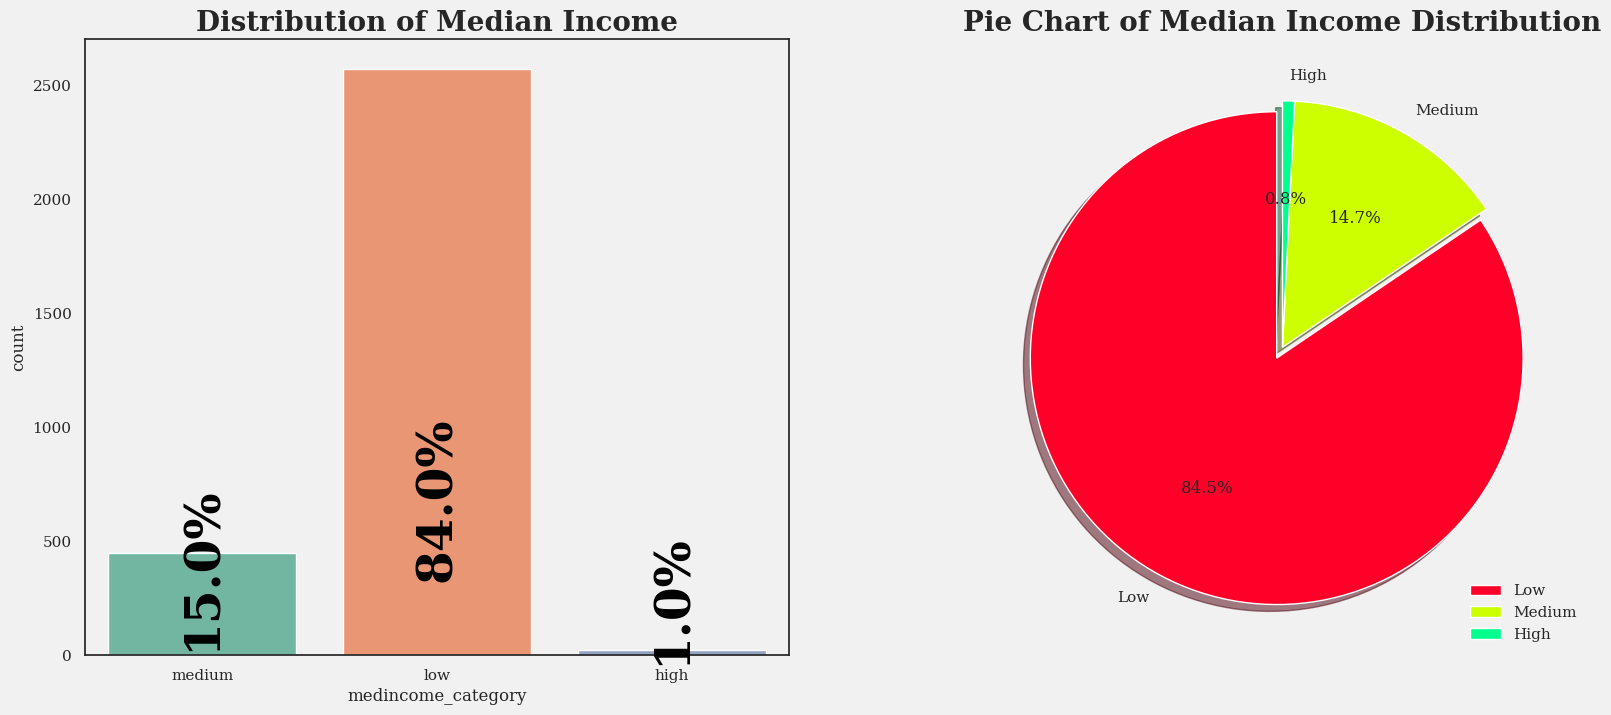

In [16]:
plt.style.background = 'white'
plt.style.use('seaborn-whitegrid')

colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='medincome_category', data=df, palette='Set2')

for i in ax.patches:
  ax.text(x = i.get_x()+i.get_width()/2, y = i.get_height()/7, s = f"{np.round(i.get_height()/len(df)*100.0)}%", ha = 'center', size = 35, weight = 'bold', rotation = 90, color = 'black')
plt.title("Distribution of Median Income", size = 20, weight = 'bold')


plt.subplot(1, 2, 2)
sizes = df['medincome_category'].value_counts()
colors = plt.cm.gist_rainbow(np.linspace(0, 1, 5))
labels = ['Low', 'Medium', 'High']
explode = [0.05, 0.0, 0.0]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart of Median Income Distribution', fontsize = 20, weight = 'bold')

# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()

> **The `'medincome_category'`column caterogory was derived from the `'medincome'` column by specifying custom labels for the bins. First, I specified the bin edges and then assigned labels to each bin.**

**Insights:**

 - **Right off the bat we can note that the low income earners are the majority of the population. Medium to high income earners are by far the minority.**

## 3.2 Bivariate Analysis

### 3.2.1 Analysis of the Median Income Column with different numerical columns

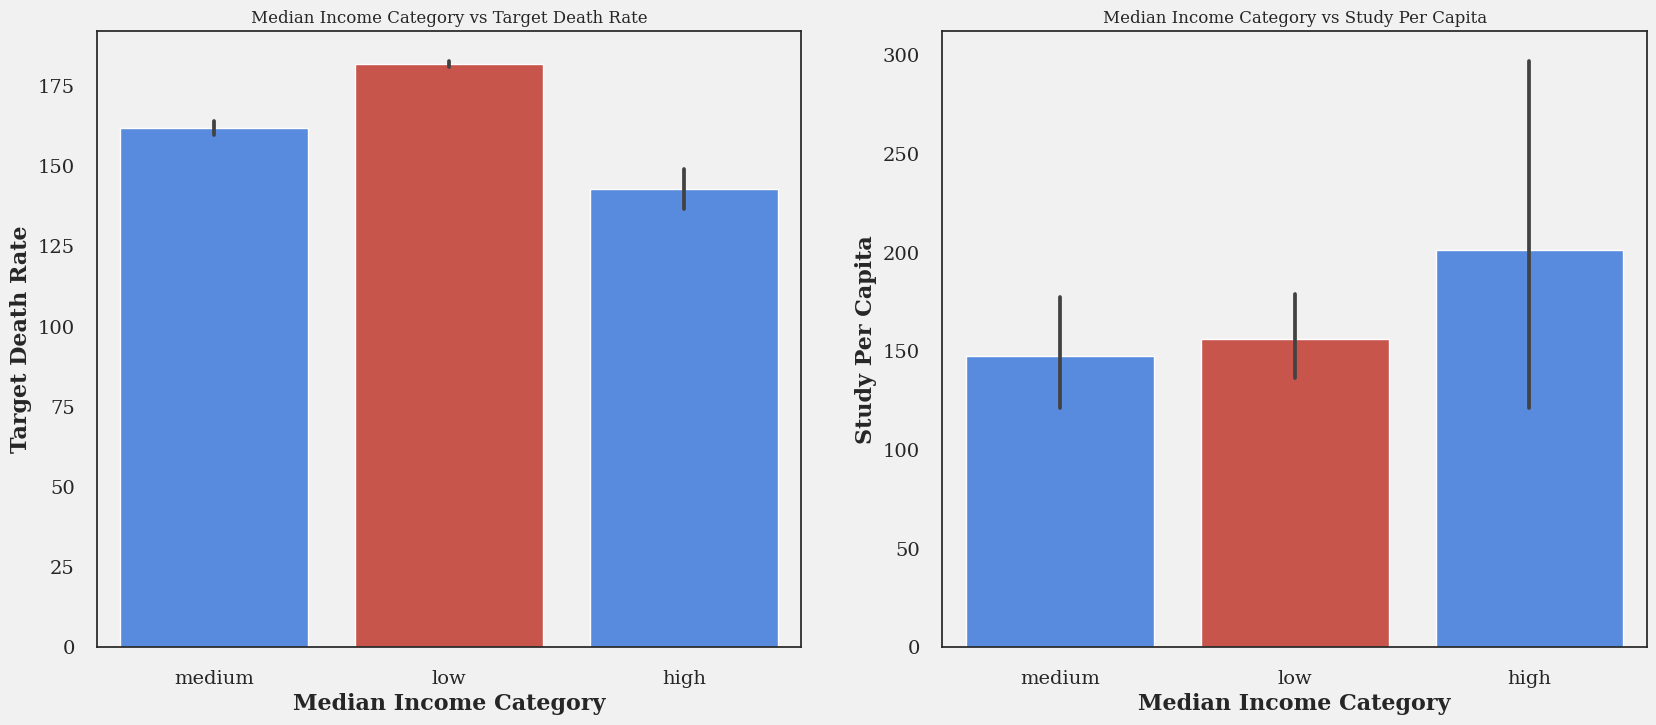

In [17]:

# Define a custom color palette
custom_palette = ['#4285F4', '#DB4437']

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first barplot with error bars
sns.barplot(data=df, x='medincome_category', y='target_deathrate', palette=custom_palette, estimator=np.mean, ax=axs[0])
axs[0].set_xlabel('Median Income Category', fontsize=16, fontweight='bold', font='Serif')
axs[0].set_ylabel('Target Death Rate', fontsize=16, fontweight='bold', font='Serif')
axs[0].set_title('Median Income Category vs Target Death Rate', fontsize=18, fontweight='bold', font='Serif')

# Plot the second barplot with error bars
sns.barplot(data=df, x='medincome_category', y='studypercap', palette=custom_palette, estimator=np.mean, ax=axs[1])
axs[1].set_xlabel('Median Income Category', fontsize=16, fontweight='bold', font='Serif')
axs[1].set_ylabel('Study Per Capita', fontsize=16, fontweight='bold', font='Serif')
axs[1].set_title('Median Income Category vs Study Per Capita', fontsize=18, fontweight='bold', font='Serif')

# Customize the tick labels
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, pad=10)
    ax.tick_params(axis='y', labelsize=14, pad=10)

# Show the plot
plt.show()

**Insights:**
- **Counties with low income earners are more likely to be at the risk of being diagnosed with cancer and in turn lead to a higher deathrate. Counties with high income earners are the less likely to be diangnosed with cancer realted risks. This could be due to access to better healthcare facilities.**
- **The highest number of cancer-related clinical trials per capita were conducted in counties where the residents were high income earners. This could be due to the disparities in healthcare access and quality.**

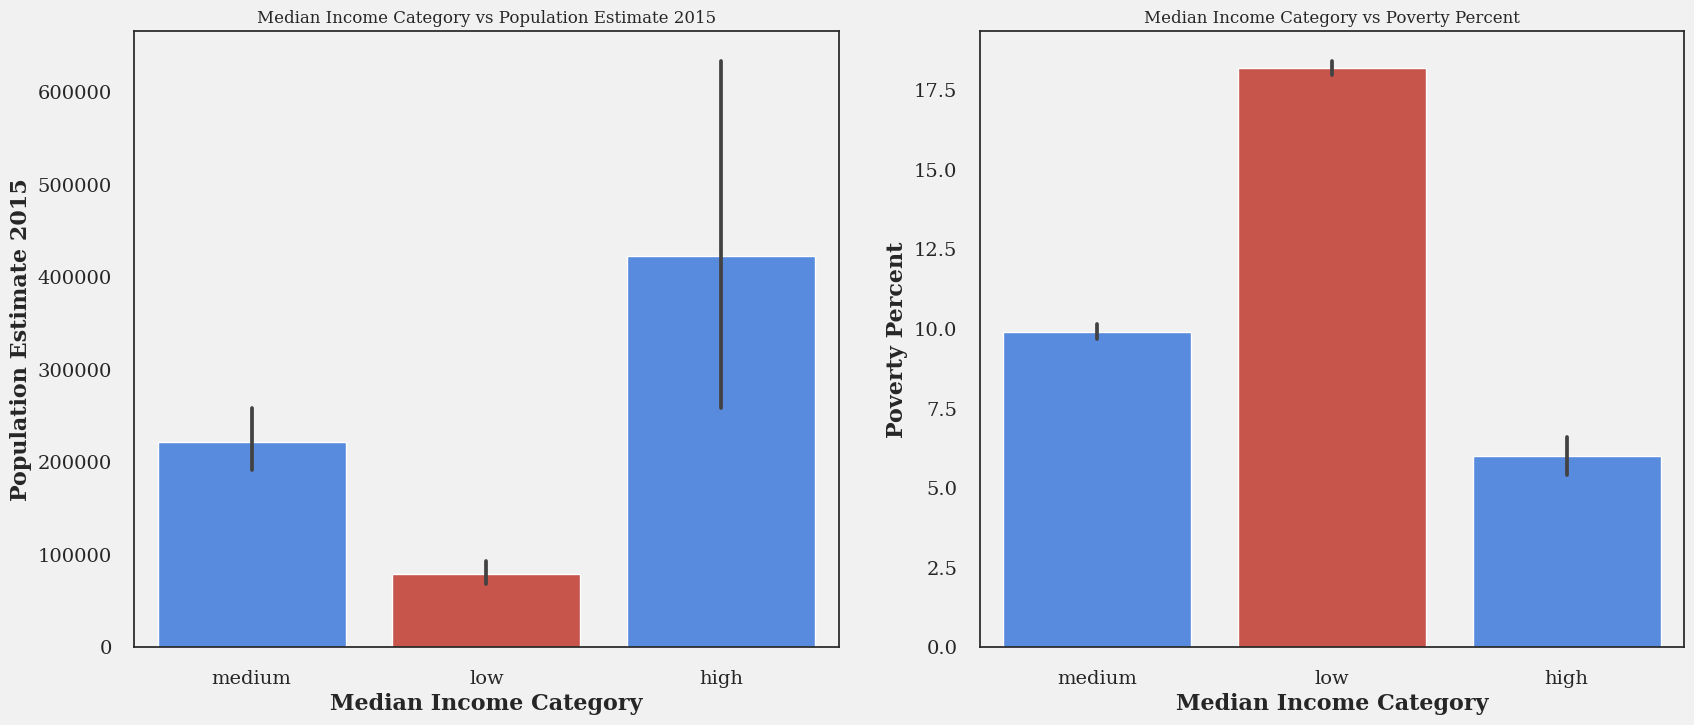

In [18]:
# Define a custom color palette
custom_palette = ['#4285F4', '#DB4437']

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first barplot with error bars
sns.barplot(data=df, x='medincome_category', y='popest2015', palette=custom_palette, estimator=np.mean, ax=axs[0])
axs[0].set_xlabel('Median Income Category', fontsize=16, fontweight='bold', font='Serif')
axs[0].set_ylabel('Population Estimate 2015', fontsize=16, fontweight='bold', font='Serif')
axs[0].set_title('Median Income Category vs Population Estimate 2015', fontsize=18, fontweight='bold', font='Serif')

# Plot the second barplot with error bars
sns.barplot(data=df, x='medincome_category', y='povertypercent', palette=custom_palette, estimator=np.mean, ax=axs[1])
axs[1].set_xlabel('Median Income Category', fontsize=16, fontweight='bold', font='Serif')
axs[1].set_ylabel('Poverty Percent', fontsize=16, fontweight='bold', font='Serif')
axs[1].set_title('Median Income Category vs Poverty Percent', fontsize=18, fontweight='bold', font='Serif')

# Customize the tick labels
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, pad=10)
    ax.tick_params(axis='y', labelsize=14, pad=10)

# Show the plot
plt.show()

**Insights:**

- **Counties with high income residents represent the highest percentage of the estimated population of the county in 2015. In contrast, counties with low income residents represent the lowest percentage of the estimated population of the county in 2015. This could be due to the disparities in healthcare access and quality.**
- **Low income residents contribute to the highest percentage of the population in poverty. This goes without saying is due to the fact that their earnings are not sustainbale enough. In contrast, high income residents contribute the least to the percentage of the population in poverty.**

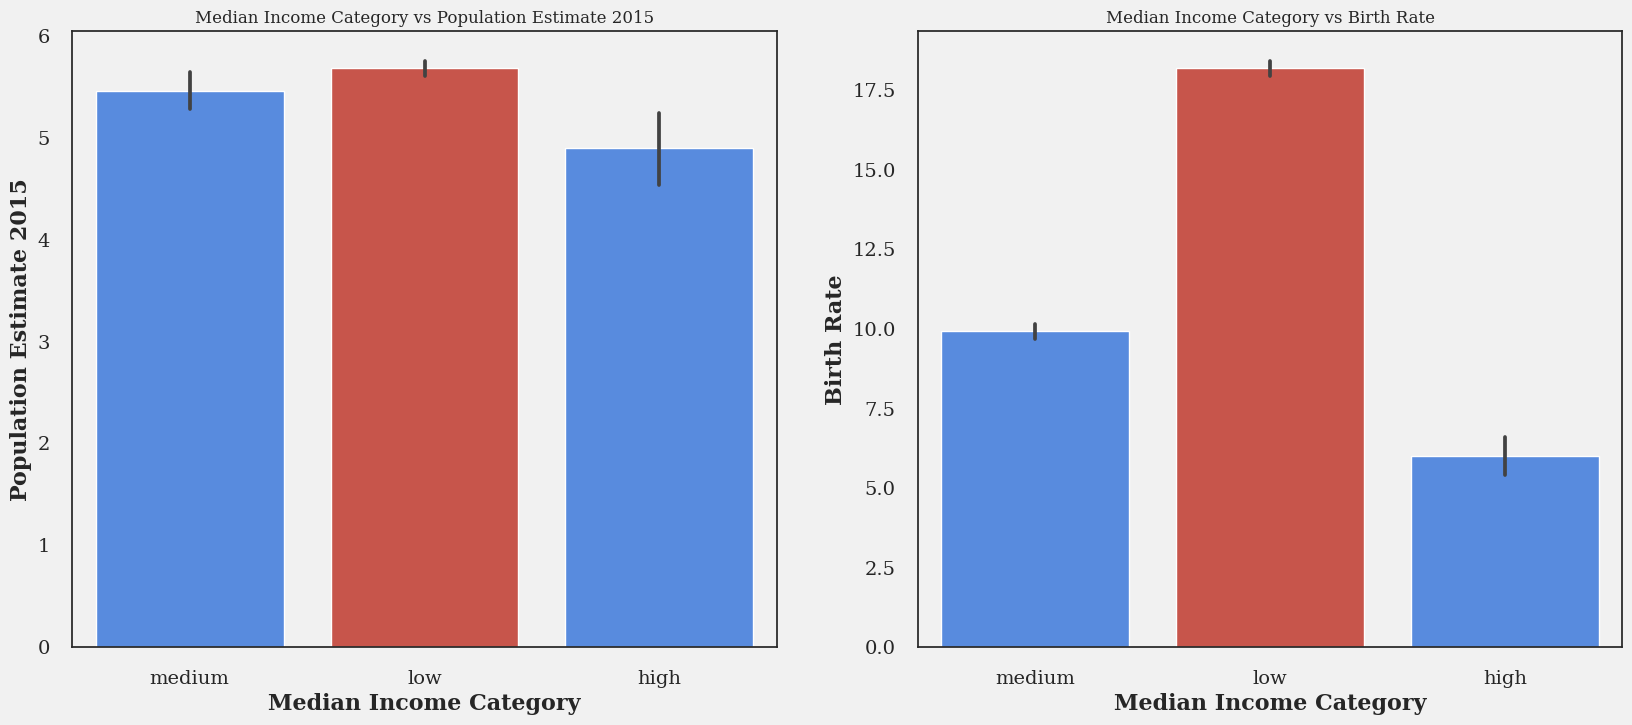

In [19]:
# Define a custom color palette
custom_palette = ['#4285F4', '#DB4437']

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first barplot with error bars
sns.barplot(data=df, x='medincome_category', y='birthrate', palette=custom_palette, estimator=np.mean, ax=axs[0])
axs[0].set_xlabel('Median Income Category', fontsize=16, fontweight='bold', font='Serif')
axs[0].set_ylabel('Population Estimate 2015', fontsize=16, fontweight='bold', font='Serif')
axs[0].set_title('Median Income Category vs Population Estimate 2015', fontsize=18, fontweight='bold', font='Serif')

# Plot the second barplot with error bars
sns.barplot(data=df, x='medincome_category', y='povertypercent', palette=custom_palette, estimator=np.mean, ax=axs[1])
axs[1].set_xlabel('Median Income Category', fontsize=16, fontweight='bold', font='Serif')
axs[1].set_ylabel('Birth Rate', fontsize=16, fontweight='bold', font='Serif')
axs[1].set_title('Median Income Category vs Birth Rate', fontsize=18, fontweight='bold', font='Serif')

# Customize the tick labels
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, pad=10)
    ax.tick_params(axis='y', labelsize=14, pad=10)

# Show the plot
plt.show()

**Insights:**
- **Counties with low income residents have the highest number of live births relative to number of women in the county. High income residents on the other hand have the lowest birthrate but the highest population of the county as of 2015.**

### 3.2.2 Analysis of the Target Variable with the Numerical Variables

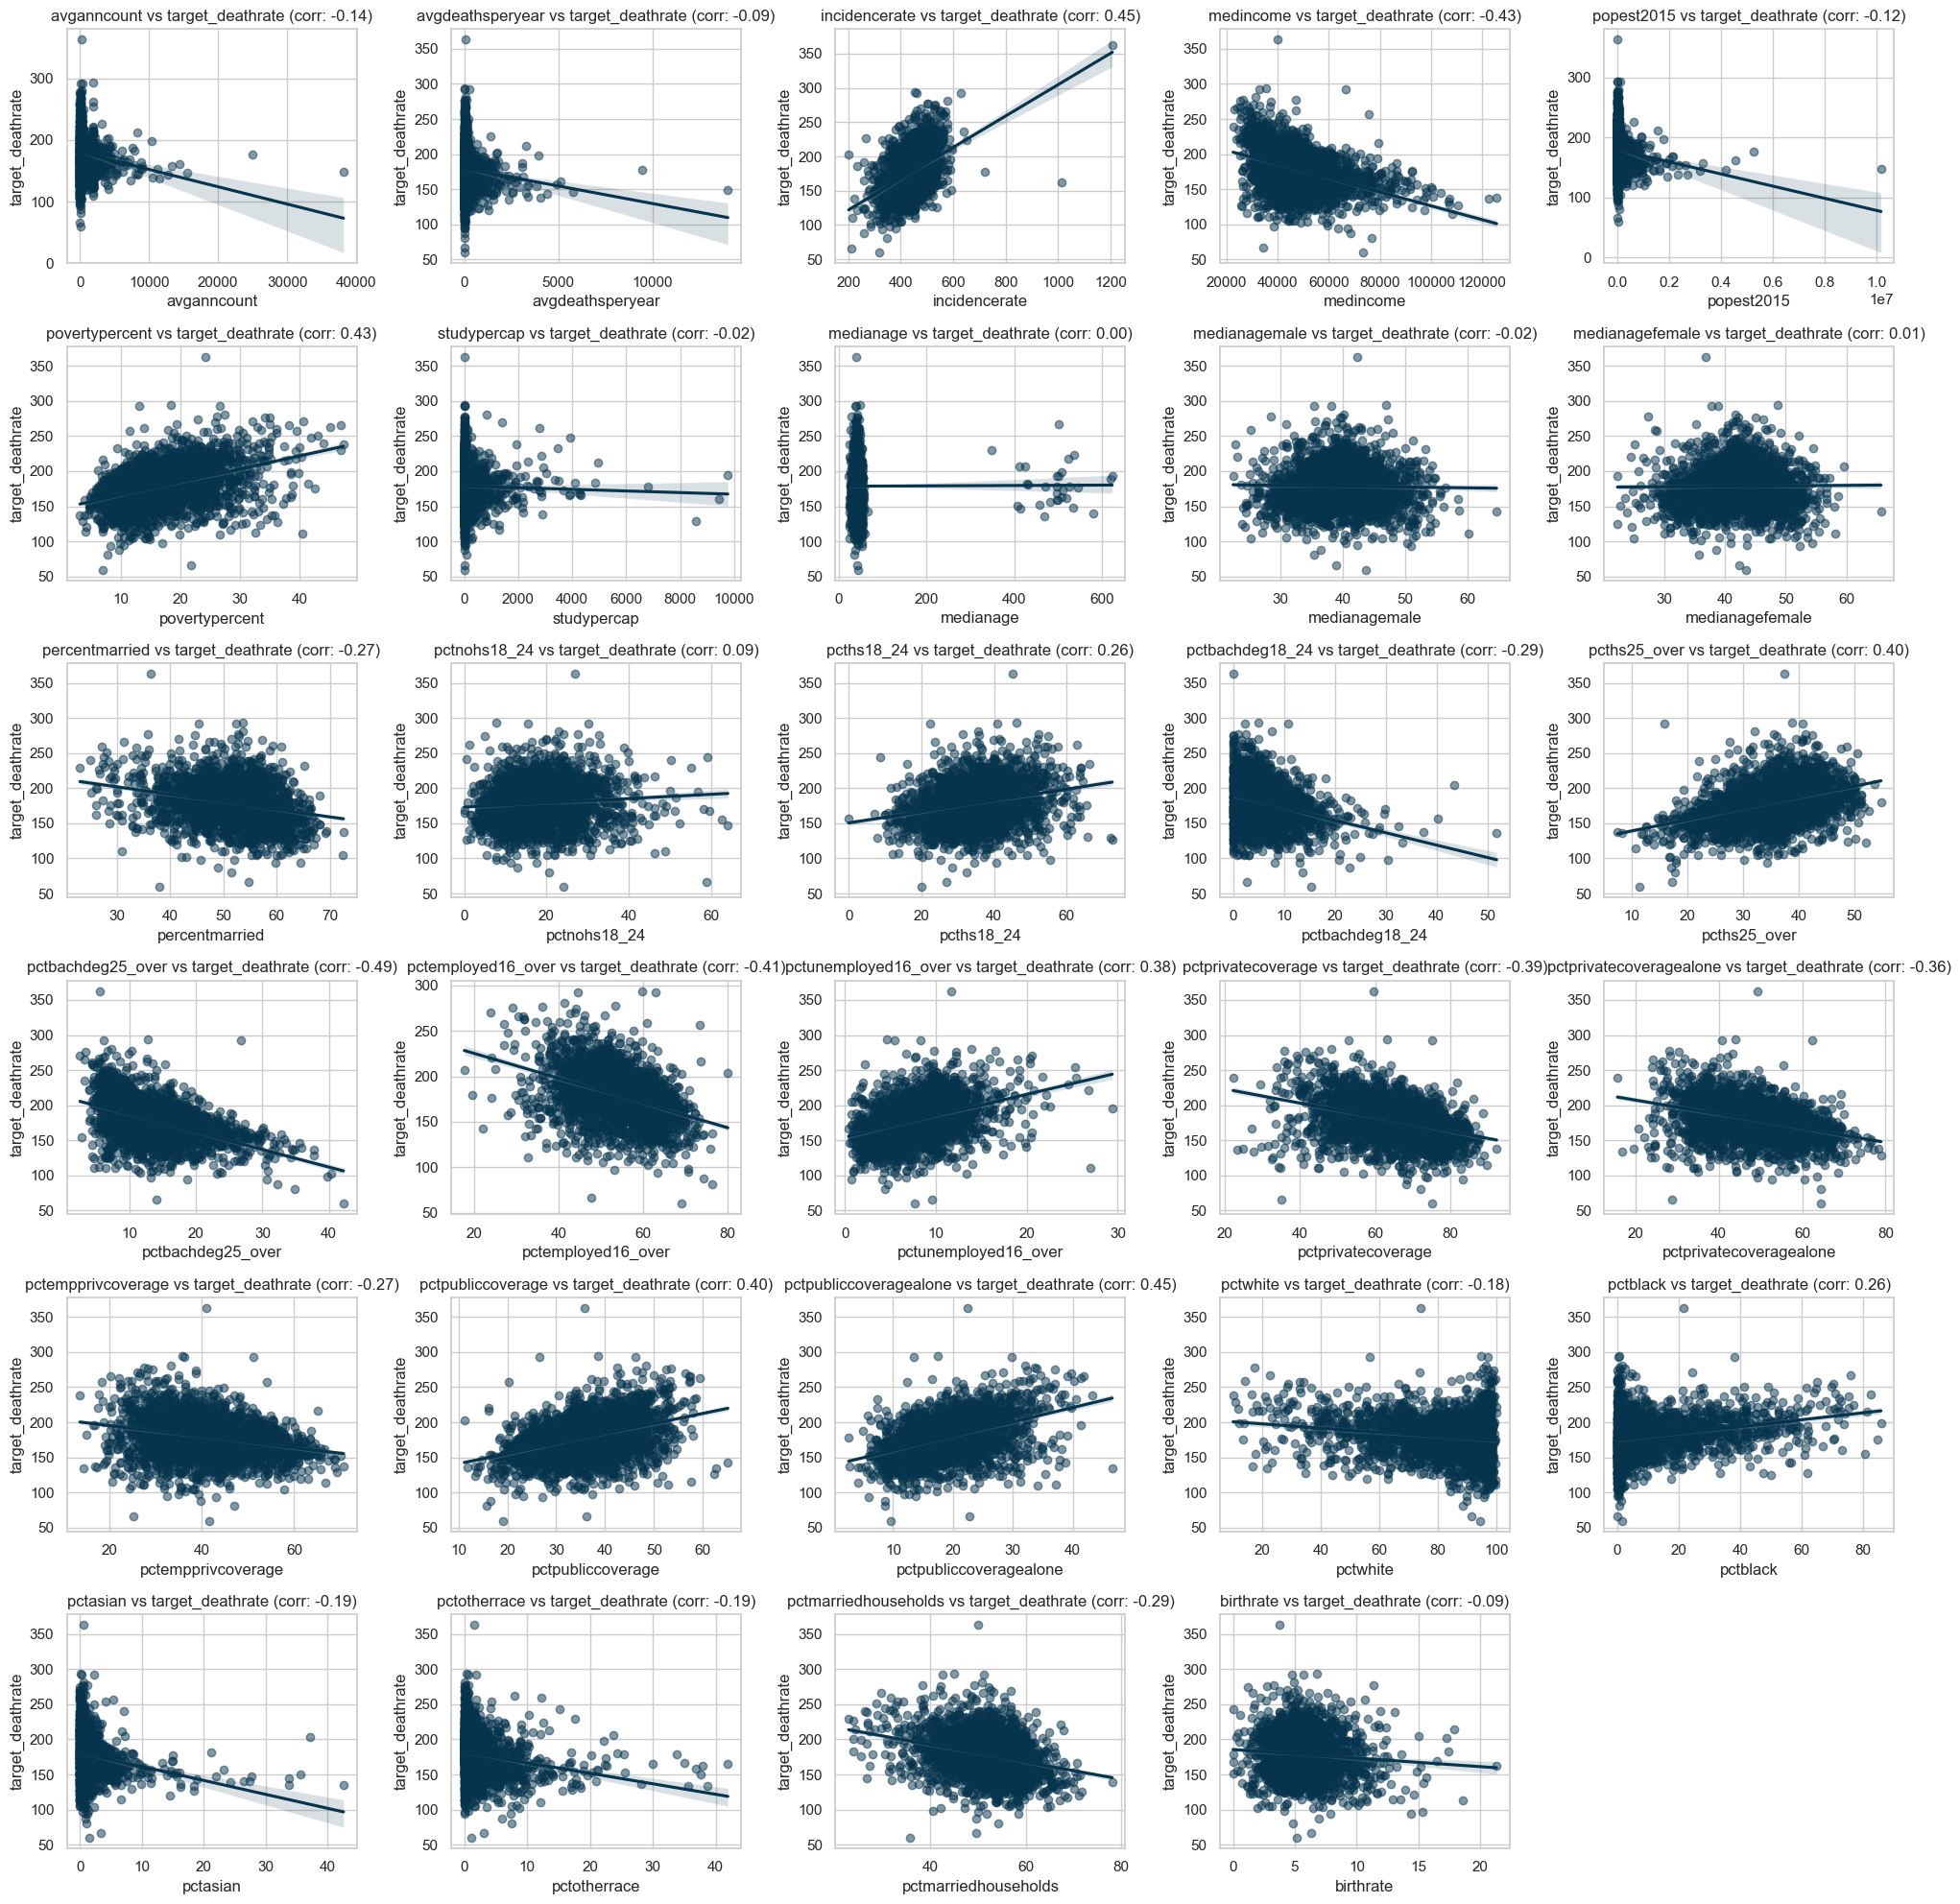

In [20]:
# Set seaborn style
sns.set_style("whitegrid")

# Get list of columns to plot against target
cols = ['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'popest2015', 'povertypercent', 'studypercap',
        'medianage', 'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate']

# Create subplots
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.flatten()

# Loop through each column and plot against target
for i, col in enumerate(cols):
    # Calculate correlation between feature and target
    corr = df['target_deathrate'].corr(df[col])
    
    # Scatter plot with regression line
    sns.regplot(x=col, y='target_deathrate', data=df, ax=axs[i], scatter_kws={'alpha':0.5})
    
    # Add title with correlation coefficient
    title = f"{col} vs target_deathrate (corr: {corr:.2f})"
    axs[i].set_title(title)

# Remove unused subplots
for i in range(len(cols), len(axs)):
    fig.delaxes(axs[i])

# Show plot
plt.tight_layout()
plt.show()

**Insights:**

- **A `-0.14` correlation between `'avganncount'` and `'target_deathrate'` implies a moderate inverse correlation. This suggests that the higher the average annual count of cancer cases is, the lower the value of 'target_deathrate' gets. Nevertheless, a correlation coefficient of -0.14 is not very powerful and thus other elements may also be causing the divergence in 'target_deathrate'.**

- **The correlation between `"avgdeathsperyear"` and `"target_deathrate"` is `-0.09`. This implies that there is a feeble negative connection between the two variables. This indicates that as the average annual count of cancer deaths rises, the value of 'target_deathrate' falls. However, a correlation coefficient of -0.09 is not very strong and so other factors may also be influencing the variation in 'target_deathrate'.**

- **A correlation of `'0.45'` between `'incidencerate'` and `'target_deathrate'` indicates a 'weak positive relationship' between the two factors. This indicates that as the cancer incidence rate increases, so does the 'target_deathrate'. Nonetheless, a correlation coefficient of 0.45 is not very strong and thus other elements may also be responsible for the variation in 'target_deathrate'.**

- **An analysis of the correlation between `'medincome'` and `'target_deathrate`' revealed a weak positive relationship of `-0.43`. This implies that when the value of 'medincome' goes up, the value of 'target_deathrate' is likely to decrease (which is reasonable as people with higher earnings tend to have better access to health services). Nonetheless, it is important to remember that correlation does not necessarily indicate causation and there might be other elements driving both 'medincome' and 'target_deathrate'.**

- **A correlation of `-0.12` between `'popest2015'` and `'target_deathrate'` suggests a feeble negative association between these two variables. This implies that when the value of the estimated population of the county in 2015 increases, the value of 'target_deathrate' is likely to go down (but not necessarily in a strong or direct way). The correlation value of -0.12 shows that there is only a slight link between these two variables and other aspects could have a more substantial effect on determining the 'target_deathrate'.**

- **After examining the data, it appears that there is no relationship between the `per capita number of cancer-related clinical trials` for each county and the target variable. This suggests that the amount of clinical trials does not likely have a great effect on the target variable.**

- **Neither the `median age of males` nor the `median age of females` dwelling in the county have any influence on the target variable. This is to be expected since the median age of those living in the county, which is a combination of the two separate variables, does not have a substantial effect on the target outcome.**

- **A weak negative connection is apparent between the percentage of county `residents who are married` and the `target death rate`, which appears to be declining. This could be owing to married couples being able to access better health services or the sharing of information among spouses. Nevertheless, the correlation coefficient of -0.27 is not very robust and so other elements may also be playing a role in the discrepancy in 'target_deathrate.**

- **It appears that there is a trend among the `population of the county in two age brackets (18-24) and (25 and up)` that indicates a `weak positive correlation` between the number of people who have either not finished high school or who have graduated and the mortality rate. As the number of county residents with the respective education rises, the target death rate increases as well.**

- **Across the two age categories of `18-24 and 25 and over`, it appears that there is a trend among county residents who have finished a bachelor's degree. The pattern displays a weak, inverse connection which suggests that as the amount of inhabitants in the county who have earned a bachelor's degree (within that age range) increases, the targeted mortality rate is likely to diminish.**

- **Results of the analysis suggest that counties with fewer live births in comparison to the number of females have a tendency towards a higher rate of cancer fatalities.**

- **As the portion of citizens `who have their own medical insurance` in the county goes up, the `death rate` is expected to decline in a weak manner. The rate of people who have their own health insurance with no help from the government also follows suit.**

- **As the proportion of inhabitants in the county aged 16 and over who are employed rises, there appears to be a decrease in the goal mortality rate. This connection is weakly negative.**

- **In contrast, ss the number of individuals over the age of 16 who are out of work within a county goes up, the corresponding deathrate also tends to rise in a weakly correlated manner.**

## 3.3 Multivariate Analysis

### 3.3.1 Checking for Correlation among the variables

In [21]:
# correlations
df_corr = df.corr()
df_corr[ "target_deathrate" ].sort_values(ascending=False)

target_deathrate           1.00
incidencerate              0.45
pctpubliccoveragealone     0.45
povertypercent             0.43
pcths25_over               0.40
pctpubliccoverage          0.40
pctunemployed16_over       0.38
pcths18_24                 0.26
pctblack                   0.26
pctnohs18_24               0.09
medianagefemale            0.01
medianage                  0.00
medianagemale             -0.02
studypercap               -0.02
birthrate                 -0.09
avgdeathsperyear          -0.09
popest2015                -0.12
avganncount               -0.14
pctwhite                  -0.18
pctasian                  -0.19
pctotherrace              -0.19
percentmarried            -0.27
pctempprivcoverage        -0.27
pctbachdeg18_24           -0.29
pctmarriedhouseholds      -0.29
pctprivatecoveragealone   -0.36
pctprivatecoverage        -0.39
pctemployed16_over        -0.41
medincome                 -0.43
pctbachdeg25_over         -0.49
Name: target_deathrate, dtype: float64

**Insights:**
 - **The correlations with the target variable show that some of the most impactful features are `incidencerate`, `pctpubliccoveragealone`, `povertypercent`, `pcths25_over`, `pctpubliccoverage` and `pctunemployed16_over`.**

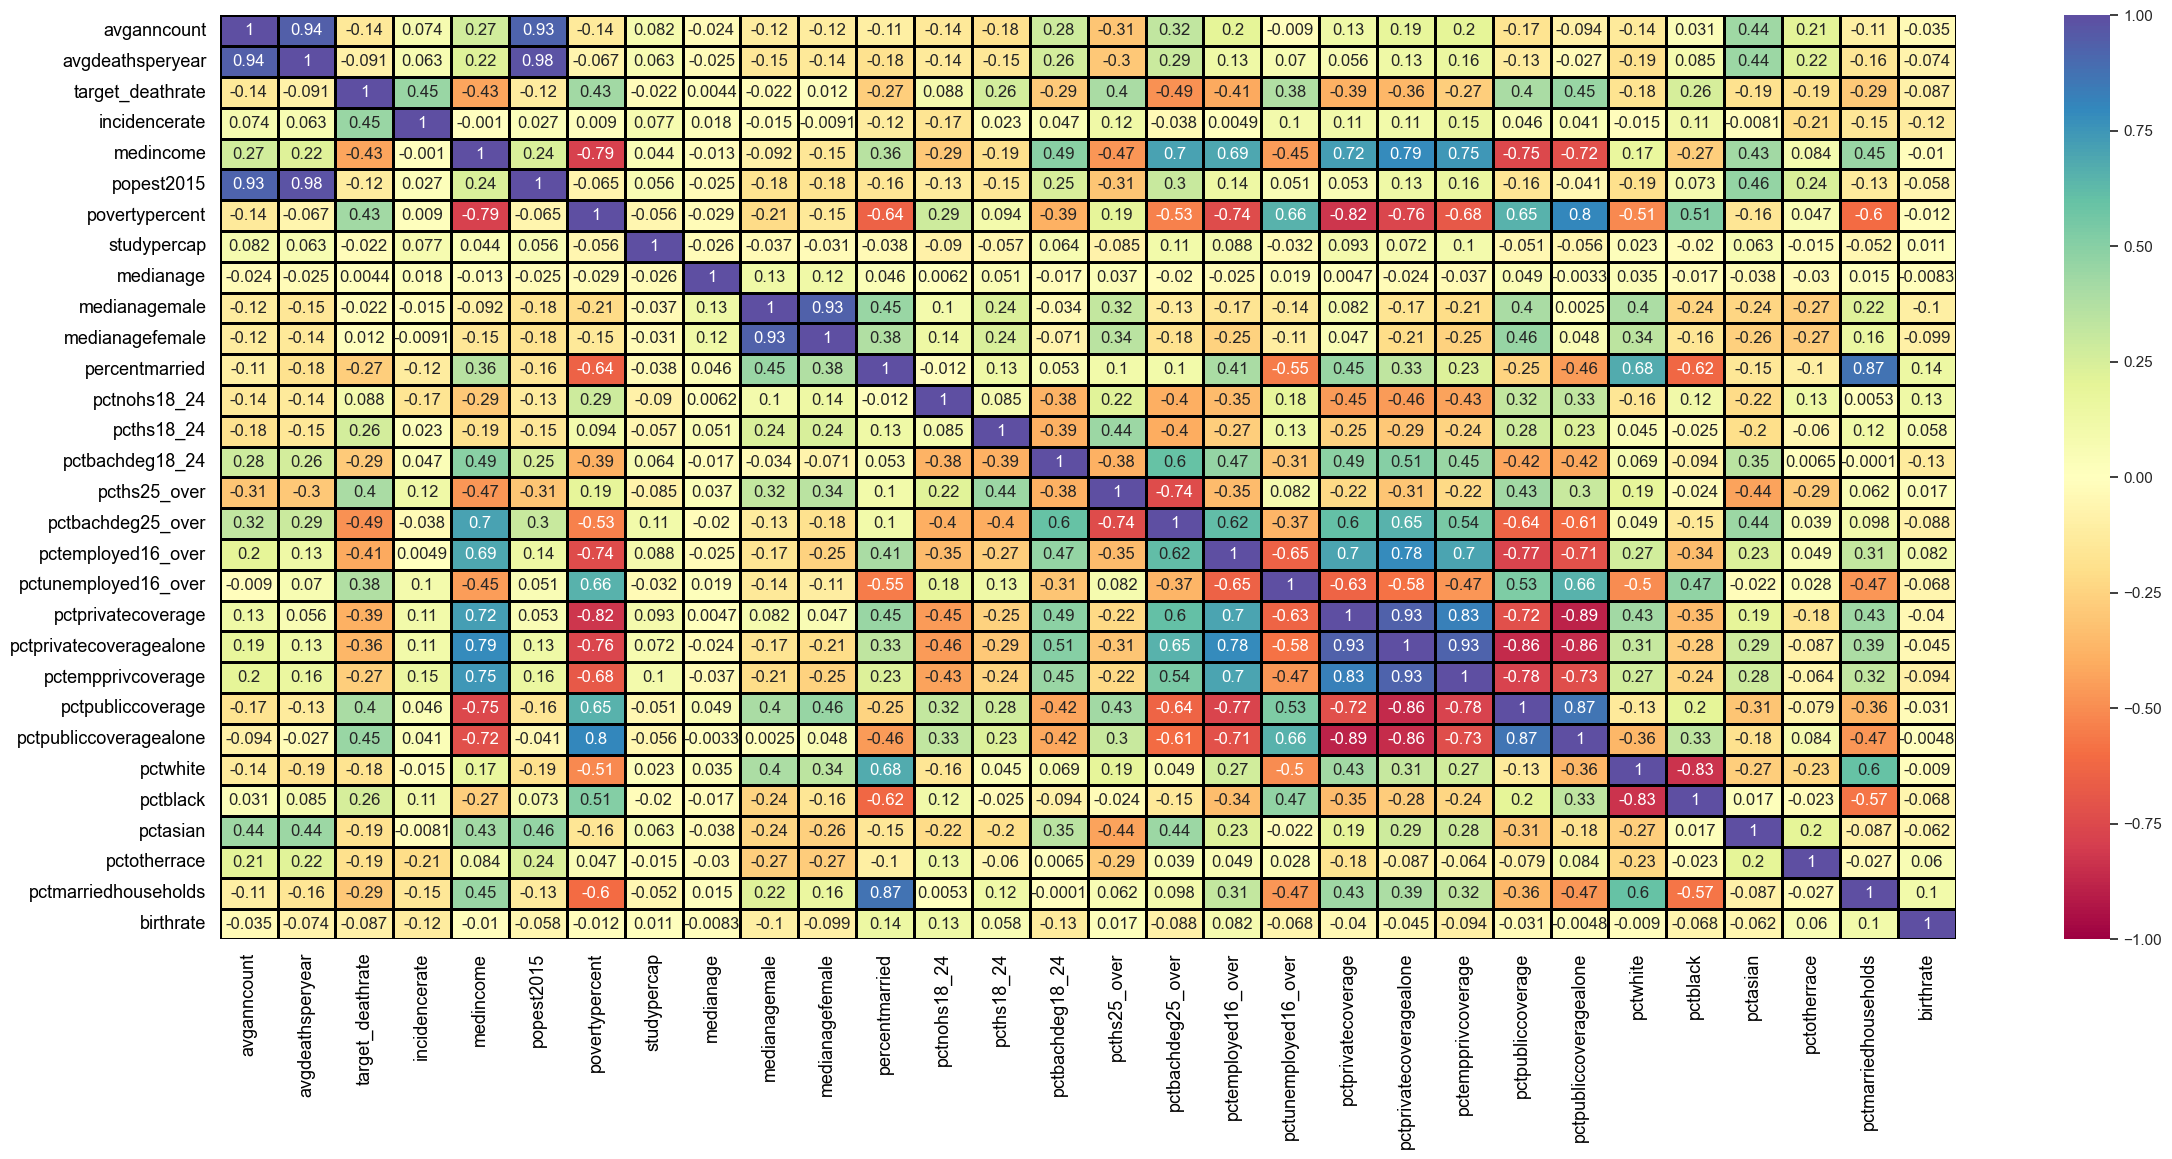

In [22]:
plt.figure(figsize = (28,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

**Insights:**
 - **We see that a lot of variables are highly correlated with one another. We will use these correlations to create Variance Inflation Factor (VIF) scores which are used to test for multicollinearity.**

### 3.3.2 Checking for Multicolinerarity using Variance Inflation Factor

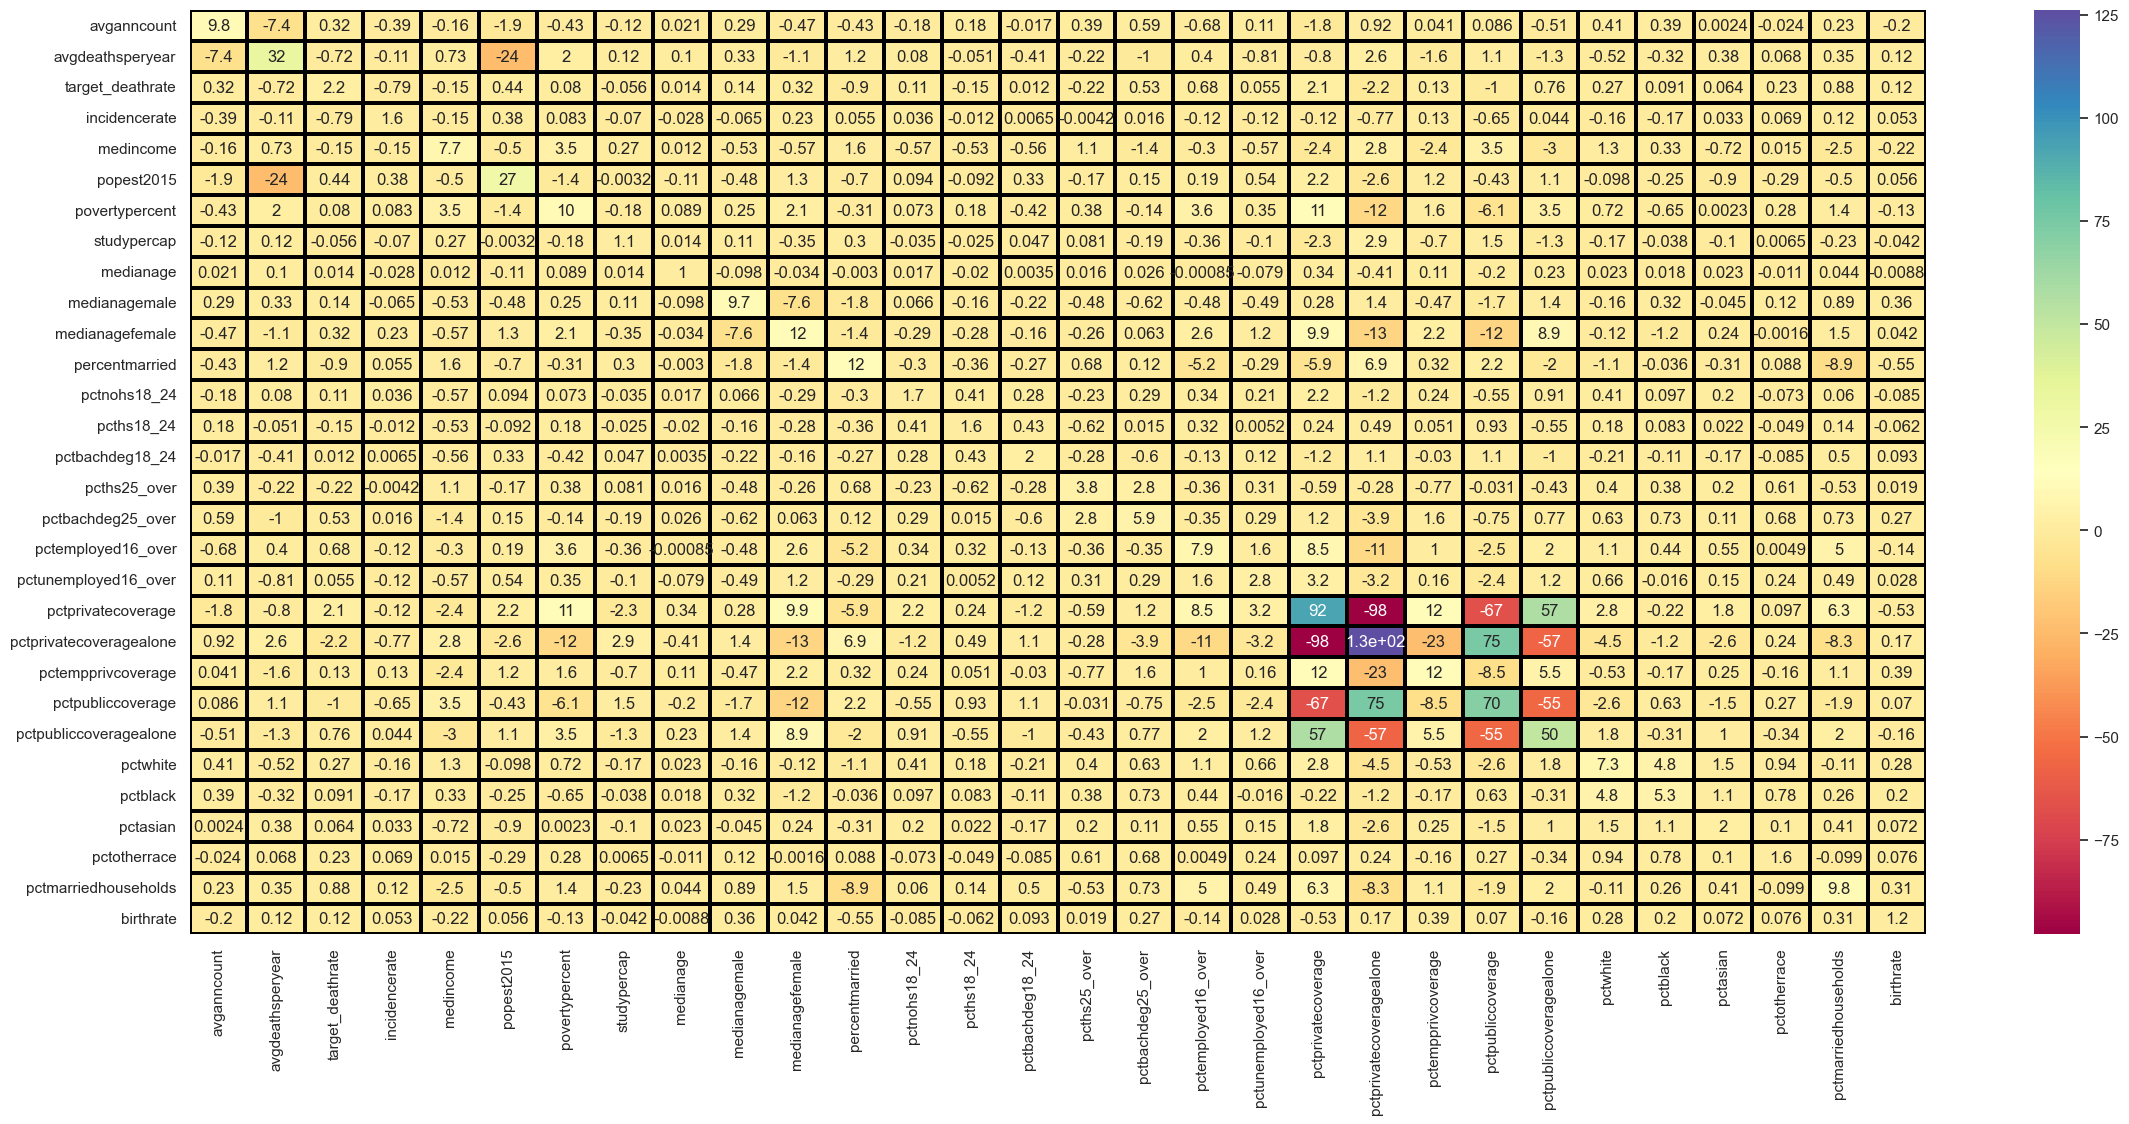

In [23]:
vif = pd.DataFrame(np.linalg.inv(df_corr.values), index = df_corr.index, columns=df_corr.columns)

# plt.style.use("ggplot")
plt.figure(figsize = (28,12))
sns.heatmap(vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

**Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.**

**Insights:**

- **A VIF score of 5 and higher indicates that that particular variable has relatively high multicollinearity with one or more variables in the dataset, and that variable needs to be removed to carry out regression. Since having little or no multicollinearity is one of the assumptions of linear regression, of which we will do multiple linear regression, we should create a dataset with little to no multicollinearity.**

### 3.3.3 Test for Multicolinerarity

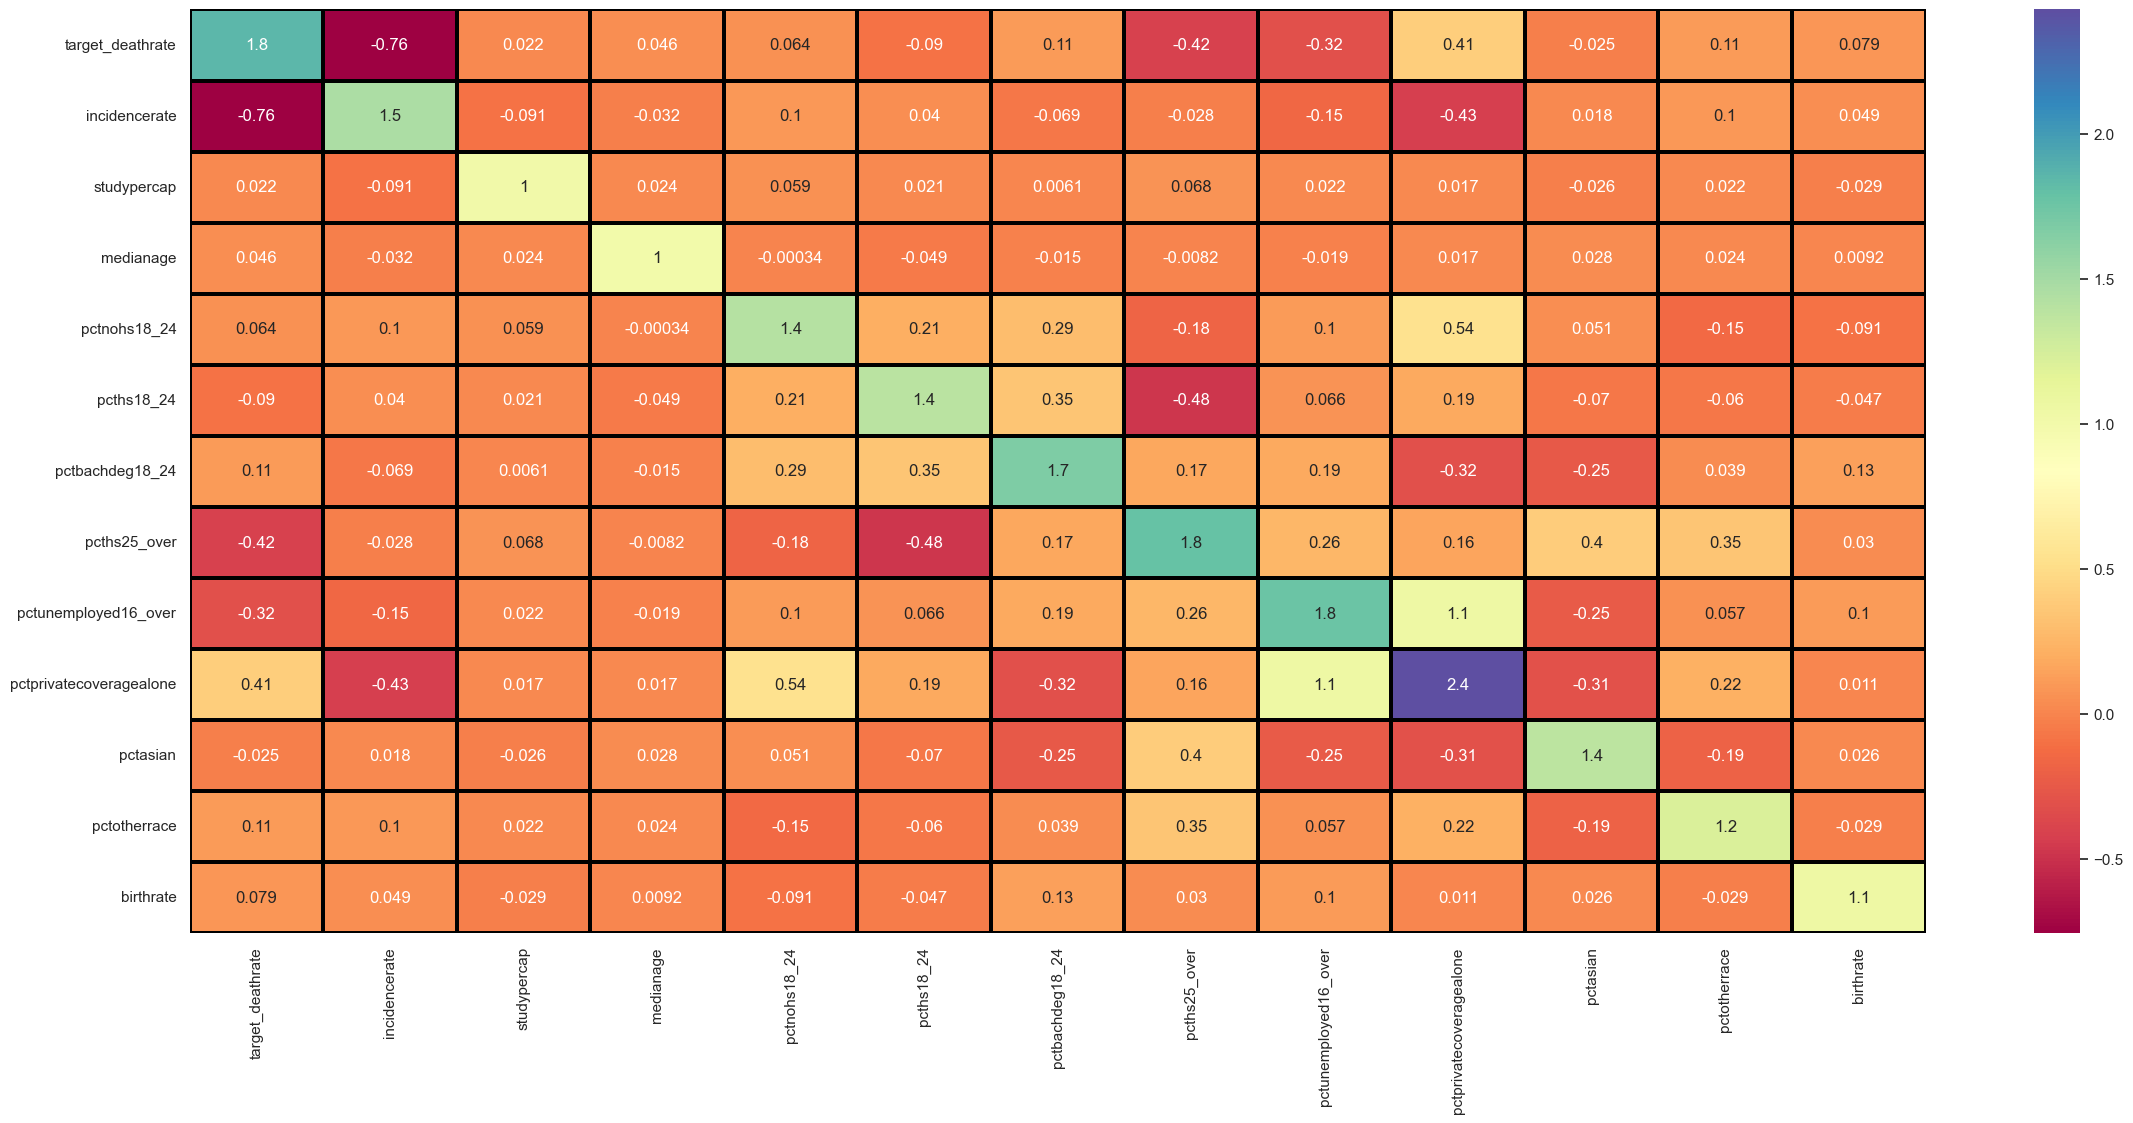

In [24]:
df = df.drop(columns = ['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015',
                                    'povertypercent', 'medianagemale', 'medianagefemale', 'percentmarried',
                                   'pctbachdeg25_over', 'pctemployed16_over', 'pctprivatecoverage', 
                                    'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 
                                    'pctwhite', 'pctblack', 'pctmarriedhouseholds', 'medincome_category'], axis = 1)


# # get the VIF score
new_corr = df.corr()
new_vif = pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

# # plot the VIF score
plt.figure(figsize = (28,12))
sns.heatmap(new_vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

**Insights:**
- **This dataset is much better suited for linear regression**

In [25]:
# saving the dataframe
df.to_csv("C:\\Users\\tarac\\Downloads\\Projects\\ml-project\\notebook\\data\\cancer_clean.csv")